In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
from datetime import datetime
import numpy as np

In [4]:
# Путь к CSV-файлу
file_path = 'train.csv'

# Импорт CSV-файл в DataFrame
df = pd.read_csv(file_path)

# Вывод DataFrame
display(df)

# Создание DataFrame для хранения признаков
df_features = pd.DataFrame()

,Пол,Дата рождения,Онкологический диагноз,Дата постановки онкологического диагноза / начала первичного лечения,Дата удаления первичного очага,Дата развития МГМ,Активирующие мутации,Дата проведения ОВГМ,Дата операции на ГМ,Число фракций СРТ,Дата 1-ой СРТ,Индекс Карновского,Число очагов в ГМ,Суммарный объем очагов,Объем максимального очага,Экстракраниальные метастазы,Лекарственное лечение,Локальный рецидив,Дистантные метастазы,Интракраниальная прогрессия
0,Ж,10.06.1962,РМЖ,01.12.1985,01.12.1985,01.09.2008,NaN,08.12.2009,нет,1,08.09.2008,90,2,"7,92","7,90",есть,NaN,нет,14.07.2009,ДМ
1,Ж,20.08.1941,РМЖ,01.12.1989,01.12.1989,01.04.2012,нет,нет,нет,1,22.06.2012,90,9,"0,52","0,14",NaN,Химиотерапия,03.10.2012,нет,ЛР
2,М,16.11.1937,РП,01.12.1990,01.12.1990,04.06.2010,NaN,нет,нет,1,26.07.2010,90,3,"5,04","3,30",есть,Таргетная терапия,нет,03.11.2010,ДМ
3,М,04.12.1946,РП,07.08.2007,31.01.1991,07.08.2007,NaN,NaN,16.08.2007,3,01.12.2008,90,3,"0,67","0,57",NaN,NaN,09.09.2009,нет,ЛР
4,Ж,28.11.1939,РП,01.12.1992,01.12.1992,09.10.2006,NaN,нет,22.10.2007,4,09.10.2006,90,2,"2,25","2,25",есть,NaN,нет,02.05.2007,ДМ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,М,18.07.1960,Меланома,NaN,NaN,NaN,NaN,NaN,08.02.2011,1,25.02.2011,80,27,"10,16","1,30",NaN,NaN,NaN,NaN,NaN
862,М,10.03.1943,НМРЛ,NaN,NaN,NaN,NaN,нет,нет,1,08.08.2011,80,2,"3,12","2,87",NaN,NaN,NaN,NaN,NaN
863,М,09.06.1963,Меланома,NaN,NaN,NaN,NaN,14.11.2011,10.10.2011,1,26.10.2011,80,8,"28,37","6,89",NaN,NaN,NaN,NaN,NaN
864,Ж,22.09.1959,НМРЛ,NaN,NaN,NaN,NaN,01.12.2010,NaN,1,23.07.2012,80,36,"21,88","4,88",NaN,NaN,NaN,NaN,NaN


In [5]:
# Удаление строк, где "Интракраниальная прогрессия" не заполнена (NaN)
df = df.dropna(subset=["Интракраниальная прогрессия"]).copy()

# Все виды значений в "Интракраниальная прогрессия"
display(df["Интракраниальная прогрессия"].value_counts())

Интракраниальная прогрессия
ДМ       278
нет      232
ЛР+ДМ     97
ЛР        67
Name: count, dtype: int64

In [9]:
# Определение ожидаемого значения для столбца "Интракраниальная прогрессия"
def determine_expected_ip(local, distant):
    # Проверяем, есть ли локальный рецидив
    has_local = isinstance(local, str) and local != "нет"
    # Проверяем, есть ли дистантные метастазы
    has_distant = isinstance(distant, str) and distant != "нет"

    if has_local and has_distant:
        return "ЛР+ДМ"
    elif has_local:
        return "ЛР"
    elif has_distant:
        return "ДМ"
    else:
        return "нет"

# Применяем функцию к каждой строке DataFrame для определения ожидаемого значения
df["Ожидаемая прогрессия"] = df.apply(
    lambda row: determine_expected_ip(row["Локальный рецидив"], row["Дистантные метастазы"]),
    axis=1
)

errors = df[df["Интракраниальная прогрессия"] != df["Ожидаемая прогрессия"]]

display(errors[["Локальный рецидив", "Дистантные метастазы", "Интракраниальная прогрессия", "Ожидаемая прогрессия"]])

,Локальный рецидив,Дистантные метастазы,Интракраниальная прогрессия,Ожидаемая прогрессия
52,нет,05.06.2017,нет,ДМ
63,нет,25.11.2011,ЛР,ДМ
265,нет,29.10.2015,нет,ДМ
267,15.07.2014,03.04.2013,ДМ,ЛР+ДМ
310,22.12.2015,нет,нет,ЛР
326,нет,14.01.2015,ЛР+ДМ,ДМ
508,нет,11.10.2017,нет,ДМ
541,08.10.2012,нет,нет,ЛР
565,нет,31.05.2010,ЛР+ДМ,ДМ
573,нет,26.03.2008,нет,ДМ


In [10]:
# Все виды значений в "Ожидаемая прогрессия"
intracranial_progression_counts = df["Ожидаемая прогрессия"].value_counts()
display(intracranial_progression_counts)

Ожидаемая прогрессия
ДМ       287
нет      220
ЛР+ДМ     99
ЛР        68
Name: count, dtype: int64

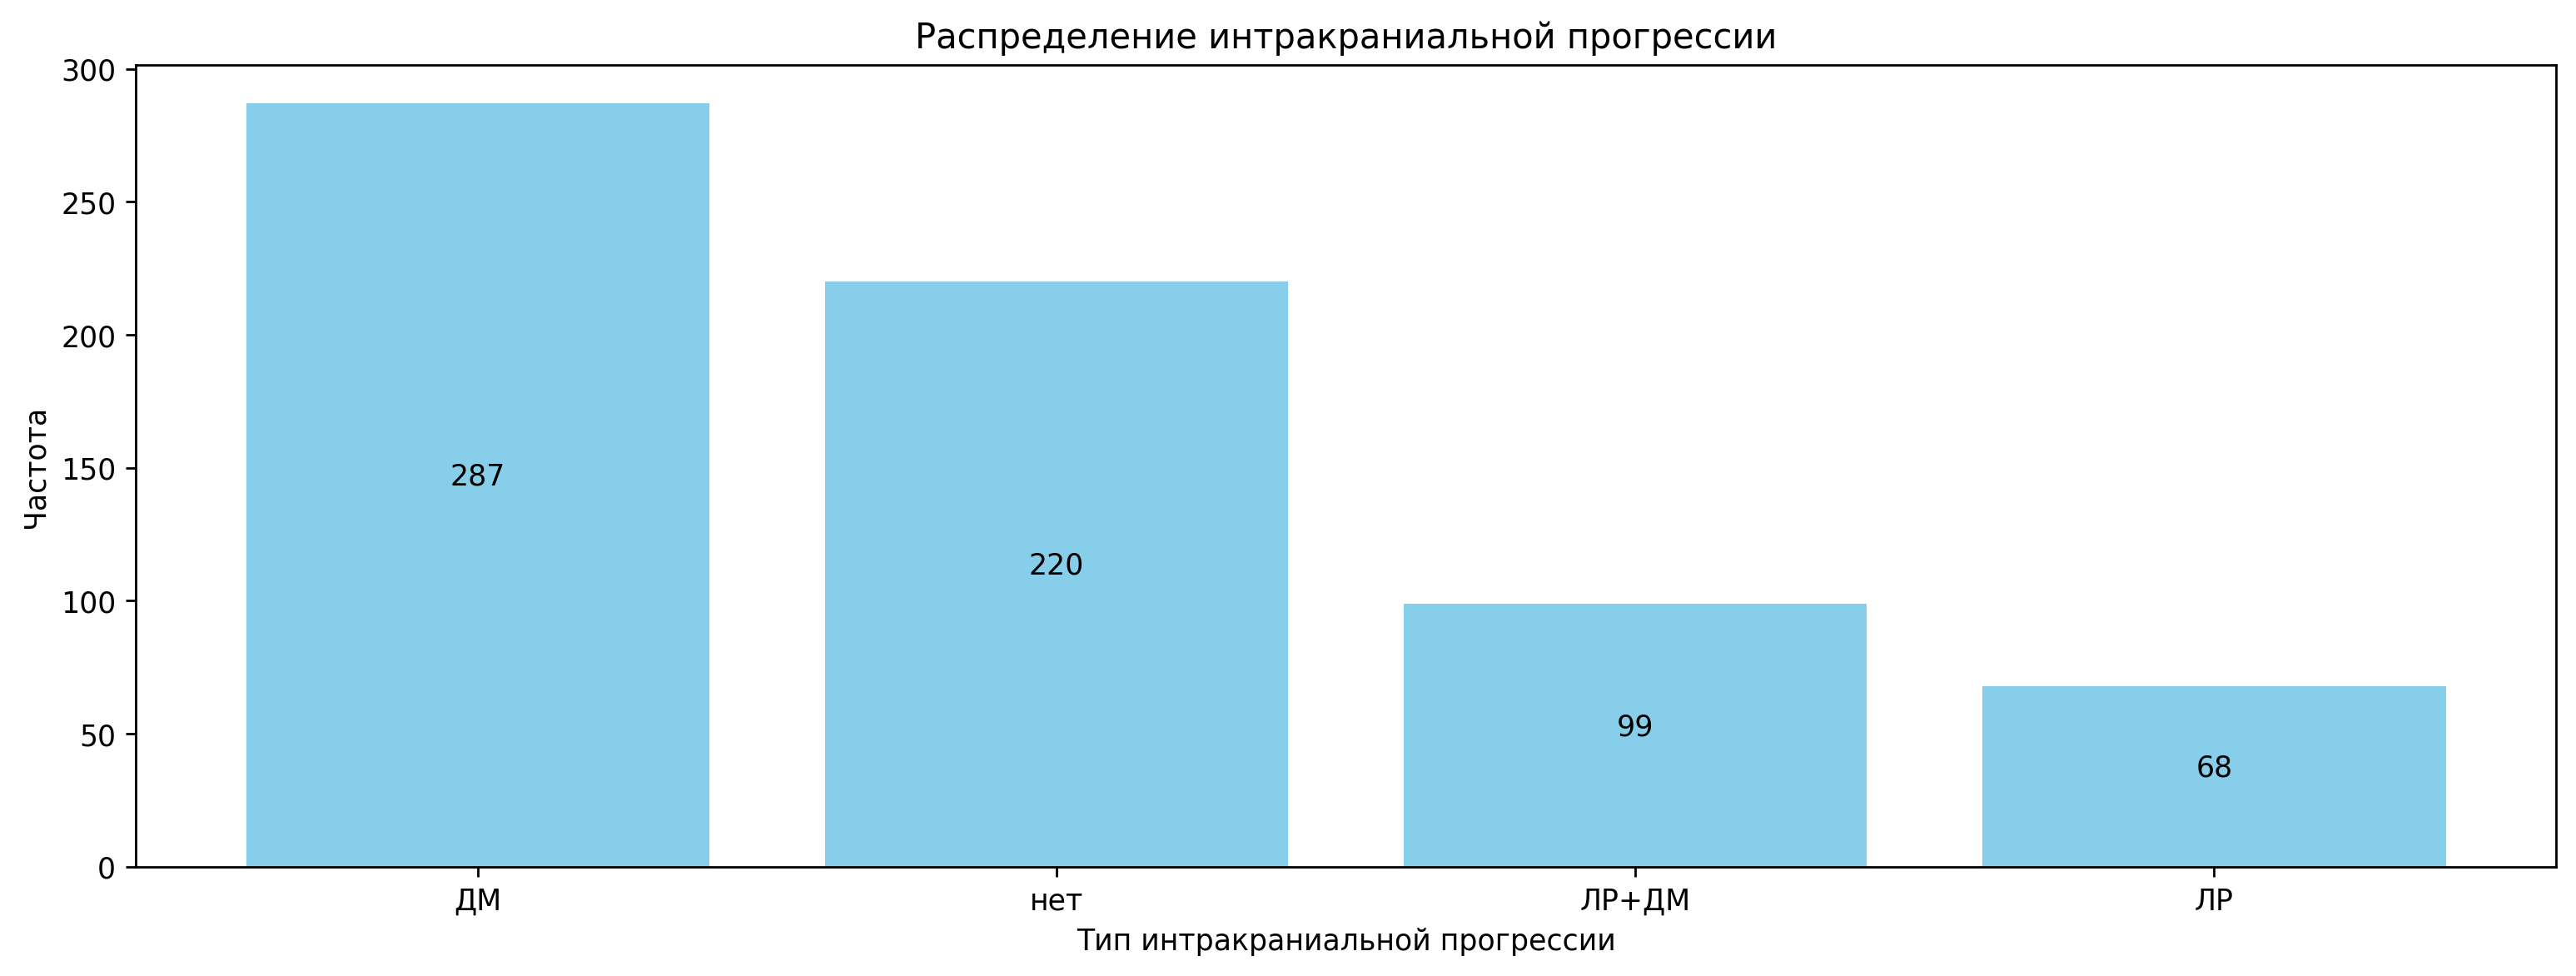

In [11]:
# Визуализация интракраниальной прогрессии
plt.figure(figsize=(15, 5), dpi=250)
bars = plt.bar(intracranial_progression_counts.index, intracranial_progression_counts.values, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height/2,
        f'{height}',
        ha='center'
    )
plt.title('Распределение интракраниальной прогрессии')
plt.xlabel('Тип интракраниальной прогрессии')
plt.ylabel('Частота')
plt.grid(False)
plt.show()

In [12]:
# Создание столбца целевой переменной
df['Прогрессия'] = np.where(df['Ожидаемая прогрессия'] == 'нет', 0, 1)

# Сохранание в DataFrame признаков
df_features['Прогрессия'] = df['Прогрессия'].astype(int)

Прогрессия
1    454
0    220
Name: count, dtype: int64

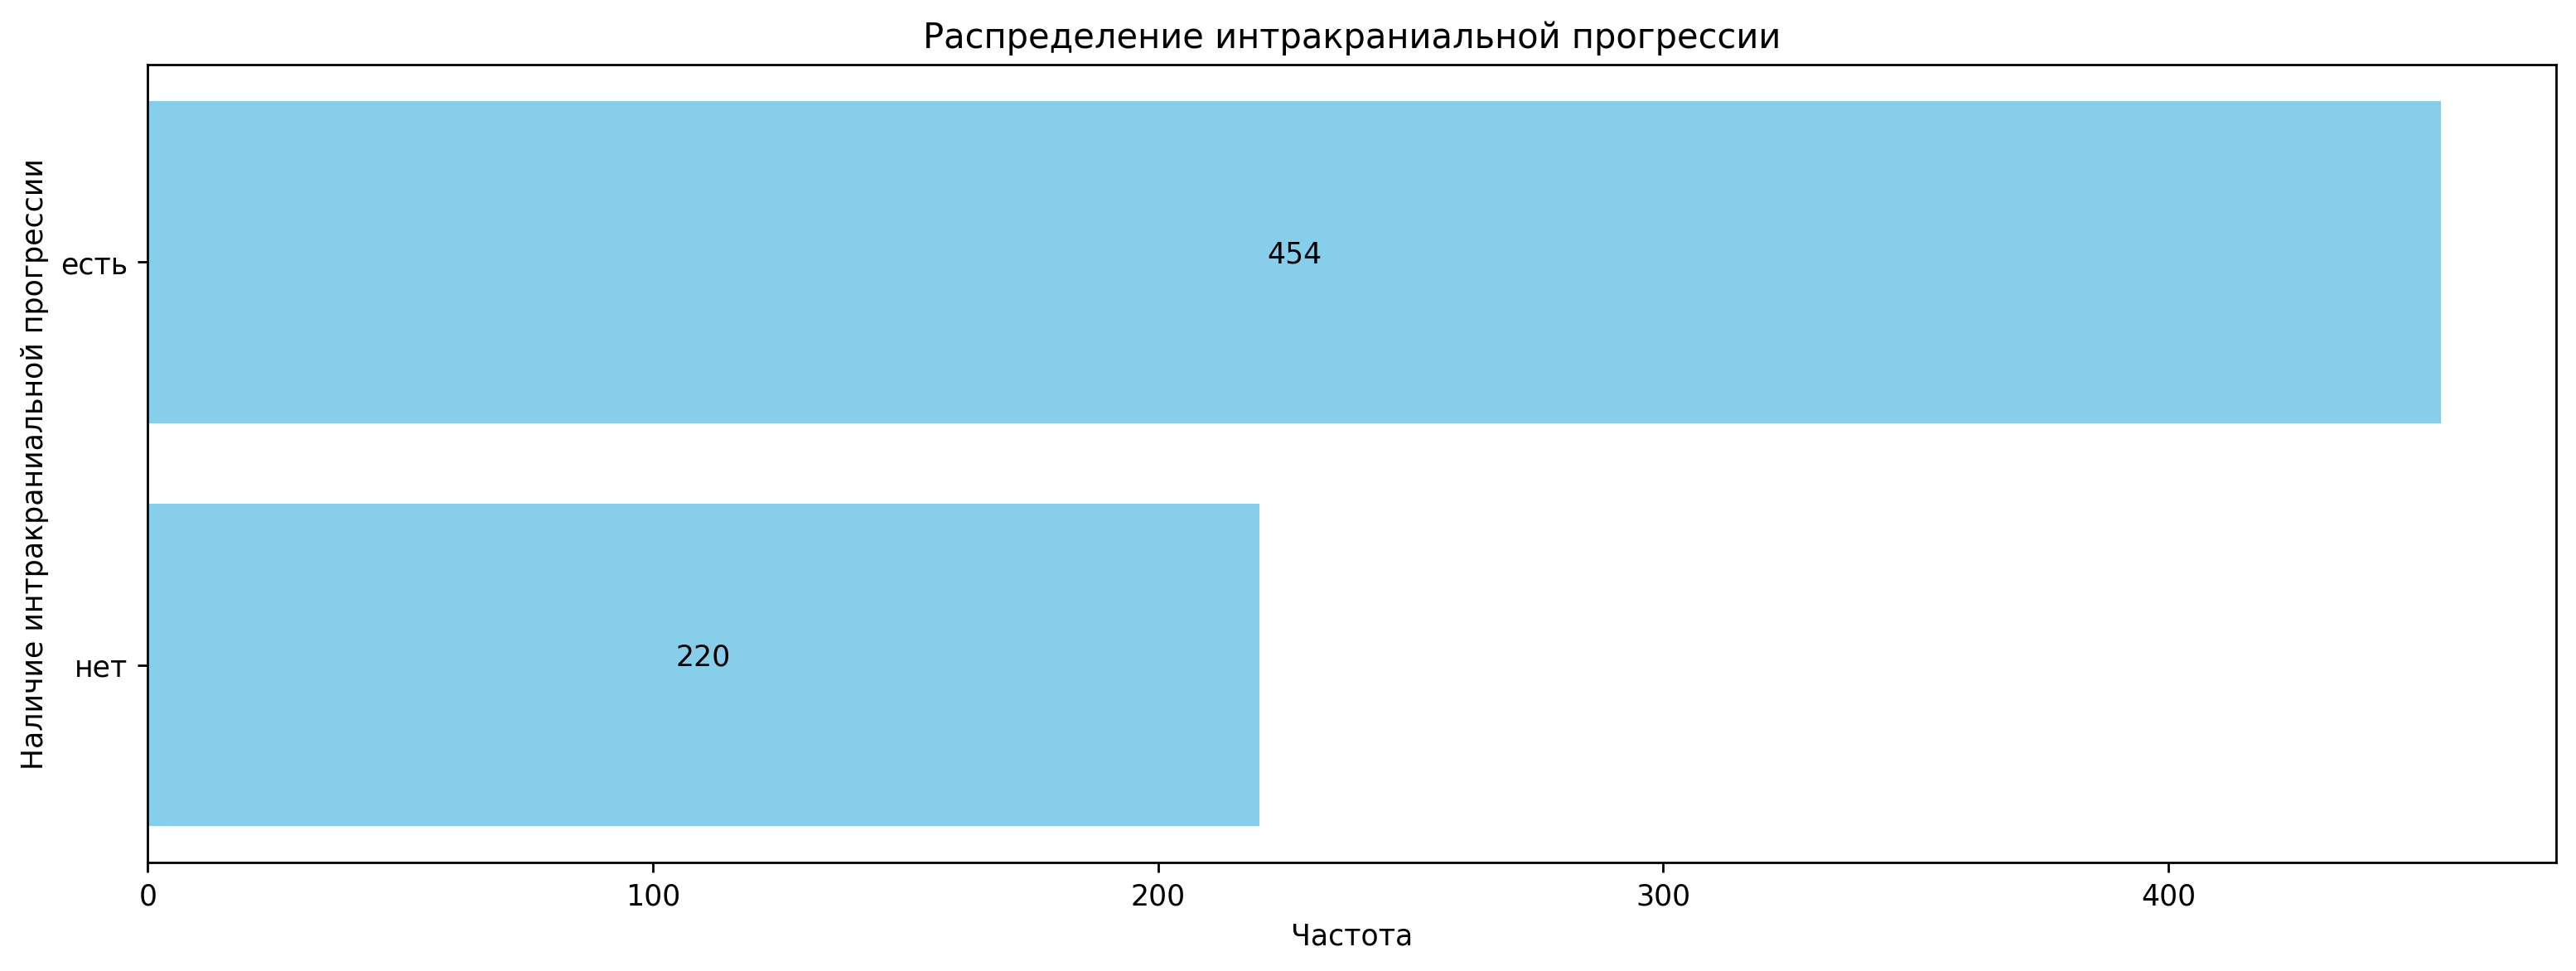

In [13]:
# Все виды значений в "Прогрессия"
progression_counts = df['Прогрессия'].value_counts()
display(progression_counts)

# Визуализация бинарной прогрессии
plt.figure(figsize=(15, 5), dpi=250)
bars = plt.barh(progression_counts.index, progression_counts.values, color='skyblue')
for bar in bars:
    width = bar.get_width()
    plt.text(
        width / 2,
        bar.get_y() + bar.get_height()/2,
        f'{width}',
        ha='center'
    )
plt.title('Распределение интракраниальной прогрессии')
plt.ylabel('Наличие интракраниальной прогрессии')
plt.yticks([0, 1], ['нет', 'есть'])
plt.xlabel('Частота')
plt.grid(False)
# plt.savefig('target_distribution.png', bbox_inches='tight', dpi=300)
plt.show()

In [14]:
# Вывод уникальных значений
print("До:")
gender_counts = df['Пол'].value_counts()
display(gender_counts)

# Приведение всех значений к одному регистру
df['Пол'] = df['Пол'].str.upper()

# Сохранение в DataFrame признаков
df_features['Пол'] = df['Пол'].replace({'М' : '0', 'Ж' : '1'}).astype('Int8')

# Вывод уникальных значений
print("После:")
gender_counts = df['Пол'].value_counts()
display(gender_counts)

До:


Пол
Ж    391
М    262
ж     14
м      7
Name: count, dtype: int64

После:


Пол
Ж    405
М    269
Name: count, dtype: int64

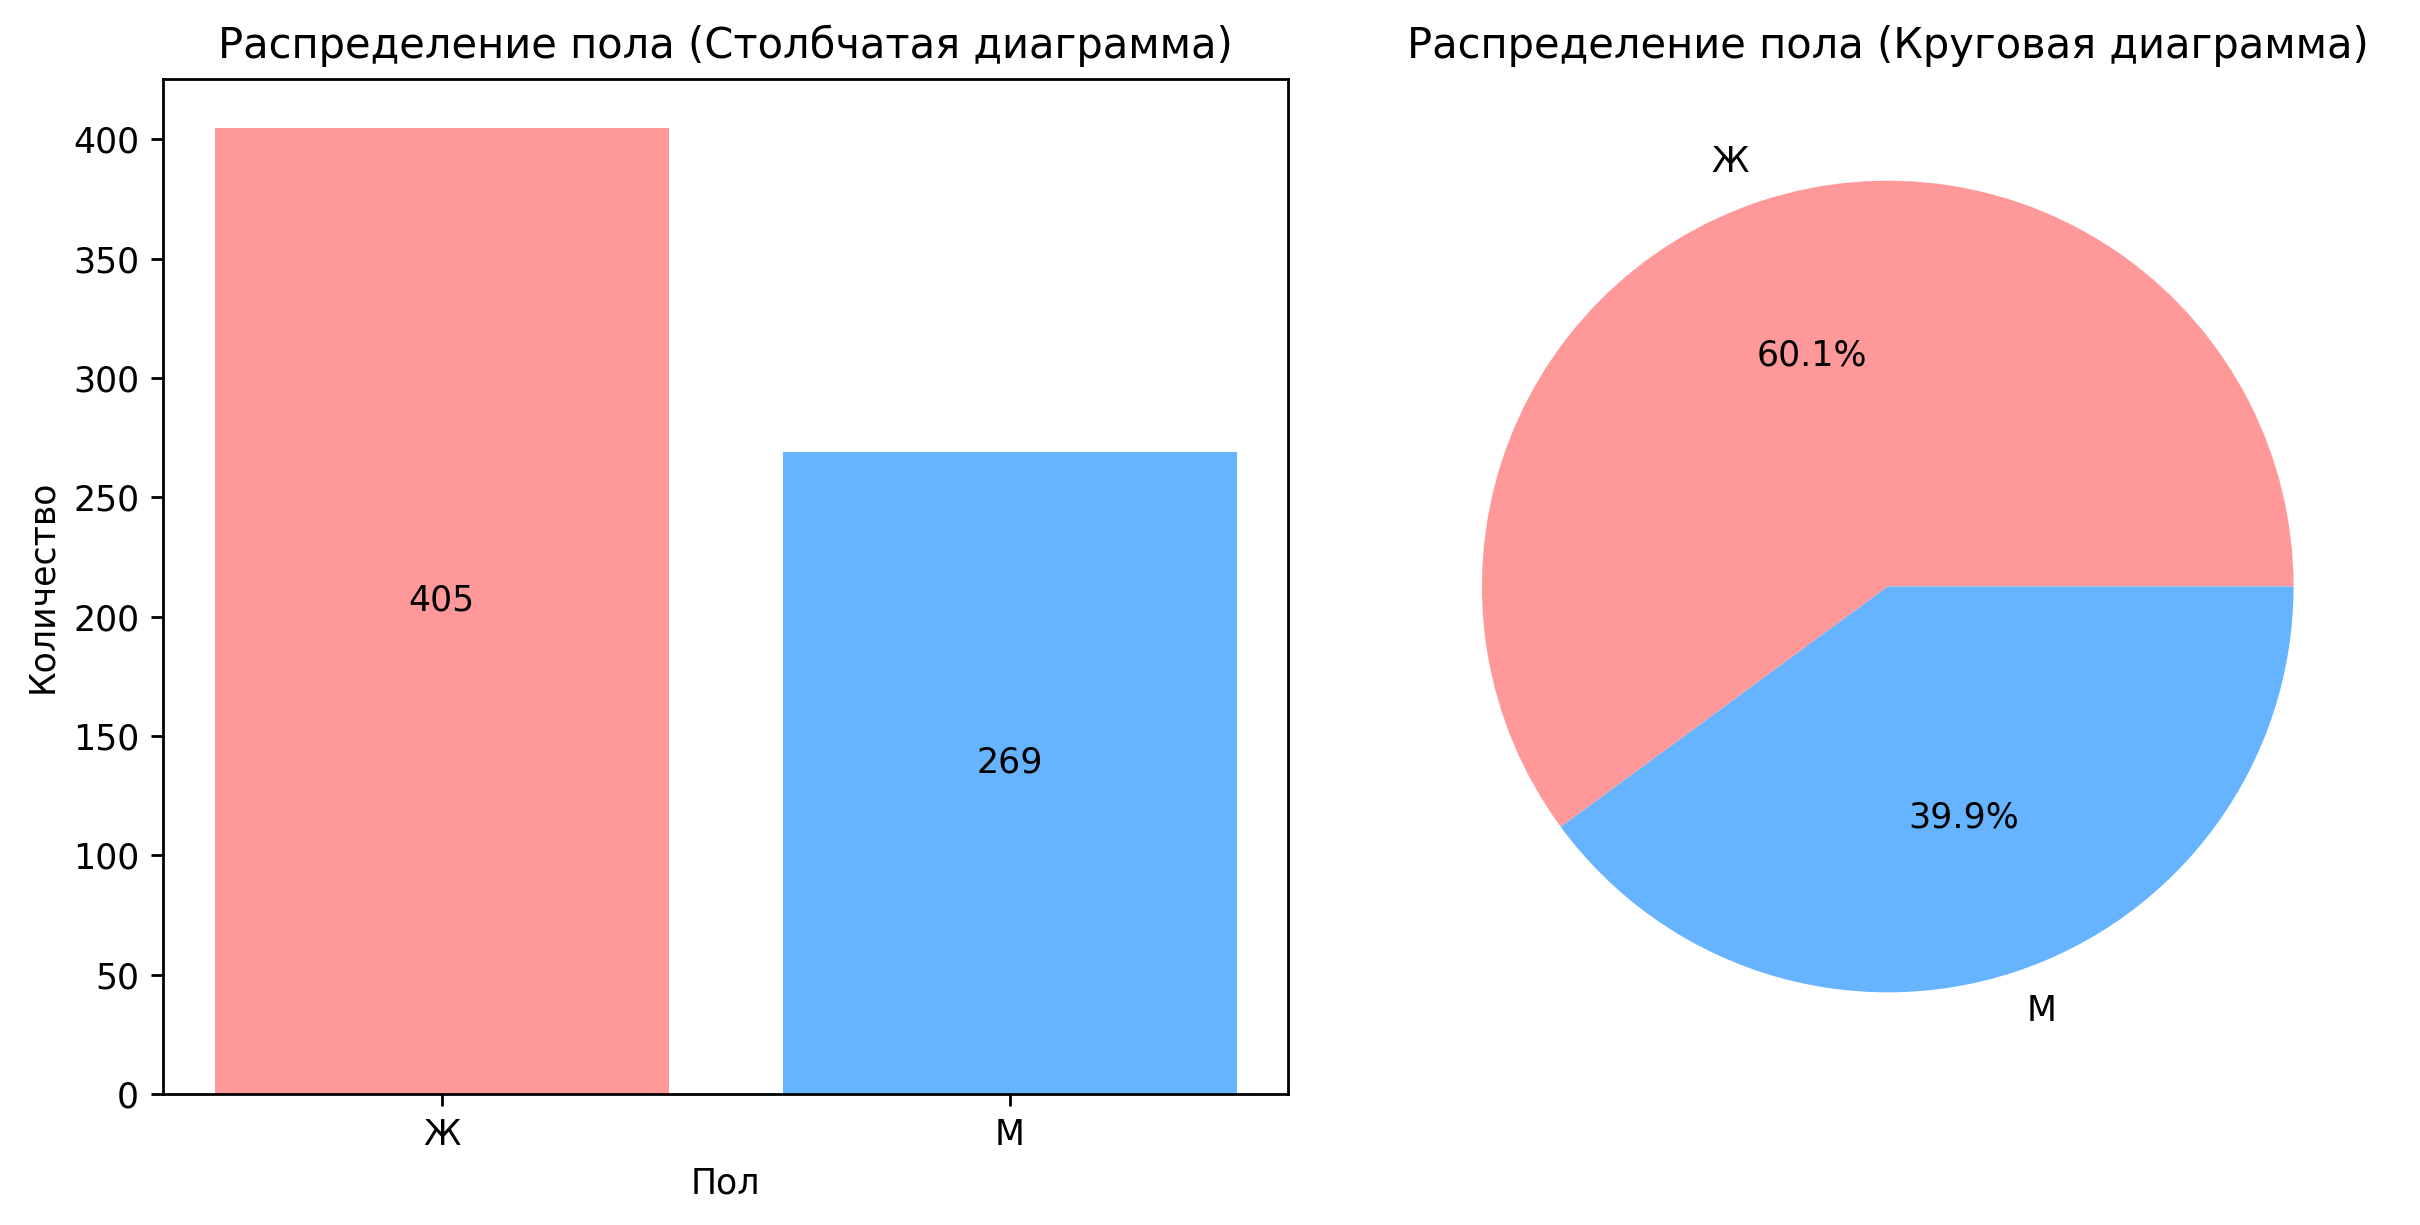

In [15]:
# Создание фигуры с двумя подграфиками (1 строка, 2 столбца)
fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=250)

# Определение цветов для графиков
colors = ['#ff9999', '#66b3ff']  # Ассоциирующиеся цвета для большей информативности

# Столбчатая диаграмма
bars = axes[0].bar(
    gender_counts.index,
    gender_counts.values,
    color=colors
  )
for bar in bars:
    height = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        height/2,
        f'{height}',
        ha='center'
    )
axes[0].set_title('Распределение пола (Столбчатая диаграмма)')
axes[0].set_xlabel('Пол')
axes[0].set_ylabel('Количество')

# Круговая диаграмма
axes[1].pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%.1f%%',
    colors=colors
)
axes[1].set_title('Распределение пола (Круговая диаграмма)')

# Автоматическая подгонка подграфиков
plt.tight_layout()

# Отображение графиков
plt.show()

In [17]:
df_features

,Прогрессия,Пол,Диагноз
0,1,1,3
1,1,1,3
2,1,0,4
3,1,0,4
4,1,1,4
...,...,...,...
847,1,0,1
848,1,0,1
849,0,0,1
850,0,0,2


In [ ]:
Диагноз{КРР, РМЖ, НМРЛ, Меланома, РП} -> КРР{0, 1}, РМЖ{0, 1}, НМРЛ{0, 1}, Меланома{0, 1}, РП{0, 1}

| Диагноз | КРР | РМЖ | НМРЛ | Меланома | РП |
| КРР     | 1   | 0   | 0    | 0        | 0  |

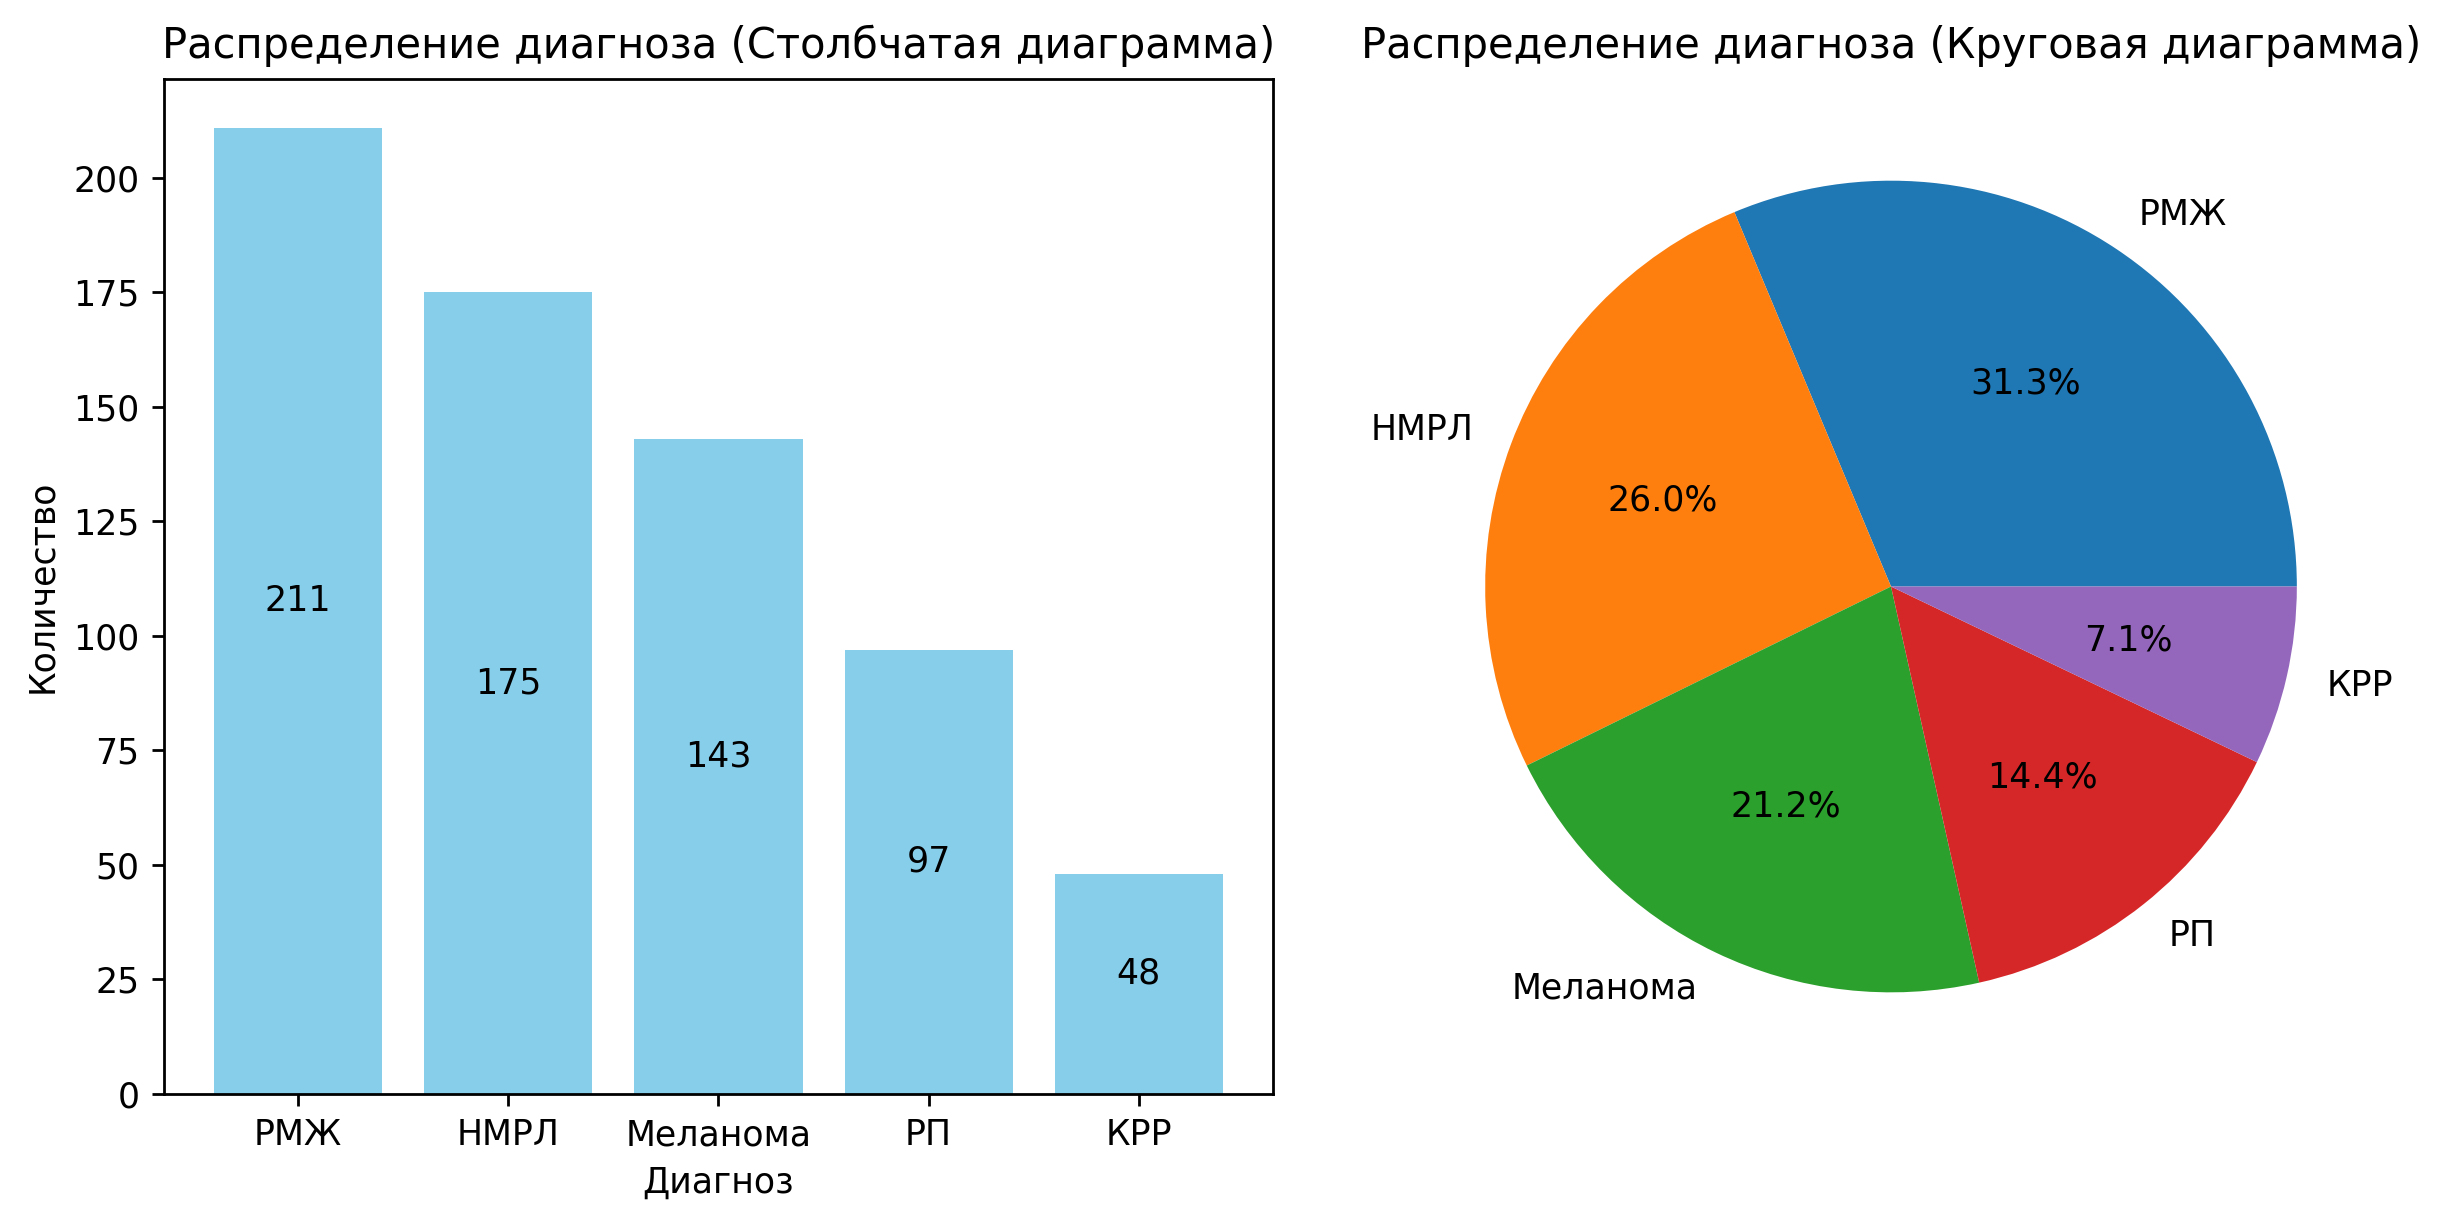

In [16]:
# Подсчет количества каждого диагноза
diagnosis_counts = df['Онкологический диагноз'].value_counts()

# Сохранение в DataFrame признаков
df_features['Диагноз'] = df['Онкологический диагноз'].astype('category').cat.codes

# Создание фигуры с двумя подграфиками (1 строка, 2 столбца)
fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=250)

# Столбчатая диаграмма
bars = axes[0].bar(
    diagnosis_counts.index,
    diagnosis_counts.values,
    color='skyblue'
  )
for bar in bars:
    height = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        height/2,
        f'{height}',
        ha='center'
    )
axes[0].set_title('Распределение диагноза (Столбчатая диаграмма)')
axes[0].set_xlabel('Диагноз')
axes[0].set_ylabel('Количество')
axes[0].grid(False)

# Круговая диаграмма
axes[1].pie(
    diagnosis_counts,
    labels=diagnosis_counts.index,
    autopct='%.1f%%'
)
axes[1].set_title('Распределение диагноза (Круговая диаграмма)')

# Автоматическая подгонка подграфиков
plt.tight_layout()

plt.savefig('diagnosis_distribution.png', bbox_inches='tight', dpi=300)

# Отображение графиков
plt.show()

In [18]:
# Проверка наличия пропущенных значений в столбце 'Число очагов в ГМ'
missing_lesions = df['Число очагов в ГМ'].isna().sum()
print(f"Количество пропущенных значений в 'Число очагов в ГМ': {missing_lesions}")

Количество пропущенных значений в 'Число очагов в ГМ': 0


In [19]:
# Преобразование в числовой тип
df['Число очагов в ГМ'] = pd.to_numeric(df['Число очагов в ГМ'])

In [20]:
# Сохранение в DataFrame признаков
df_features['Число очагов'] = df['Число очагов в ГМ']

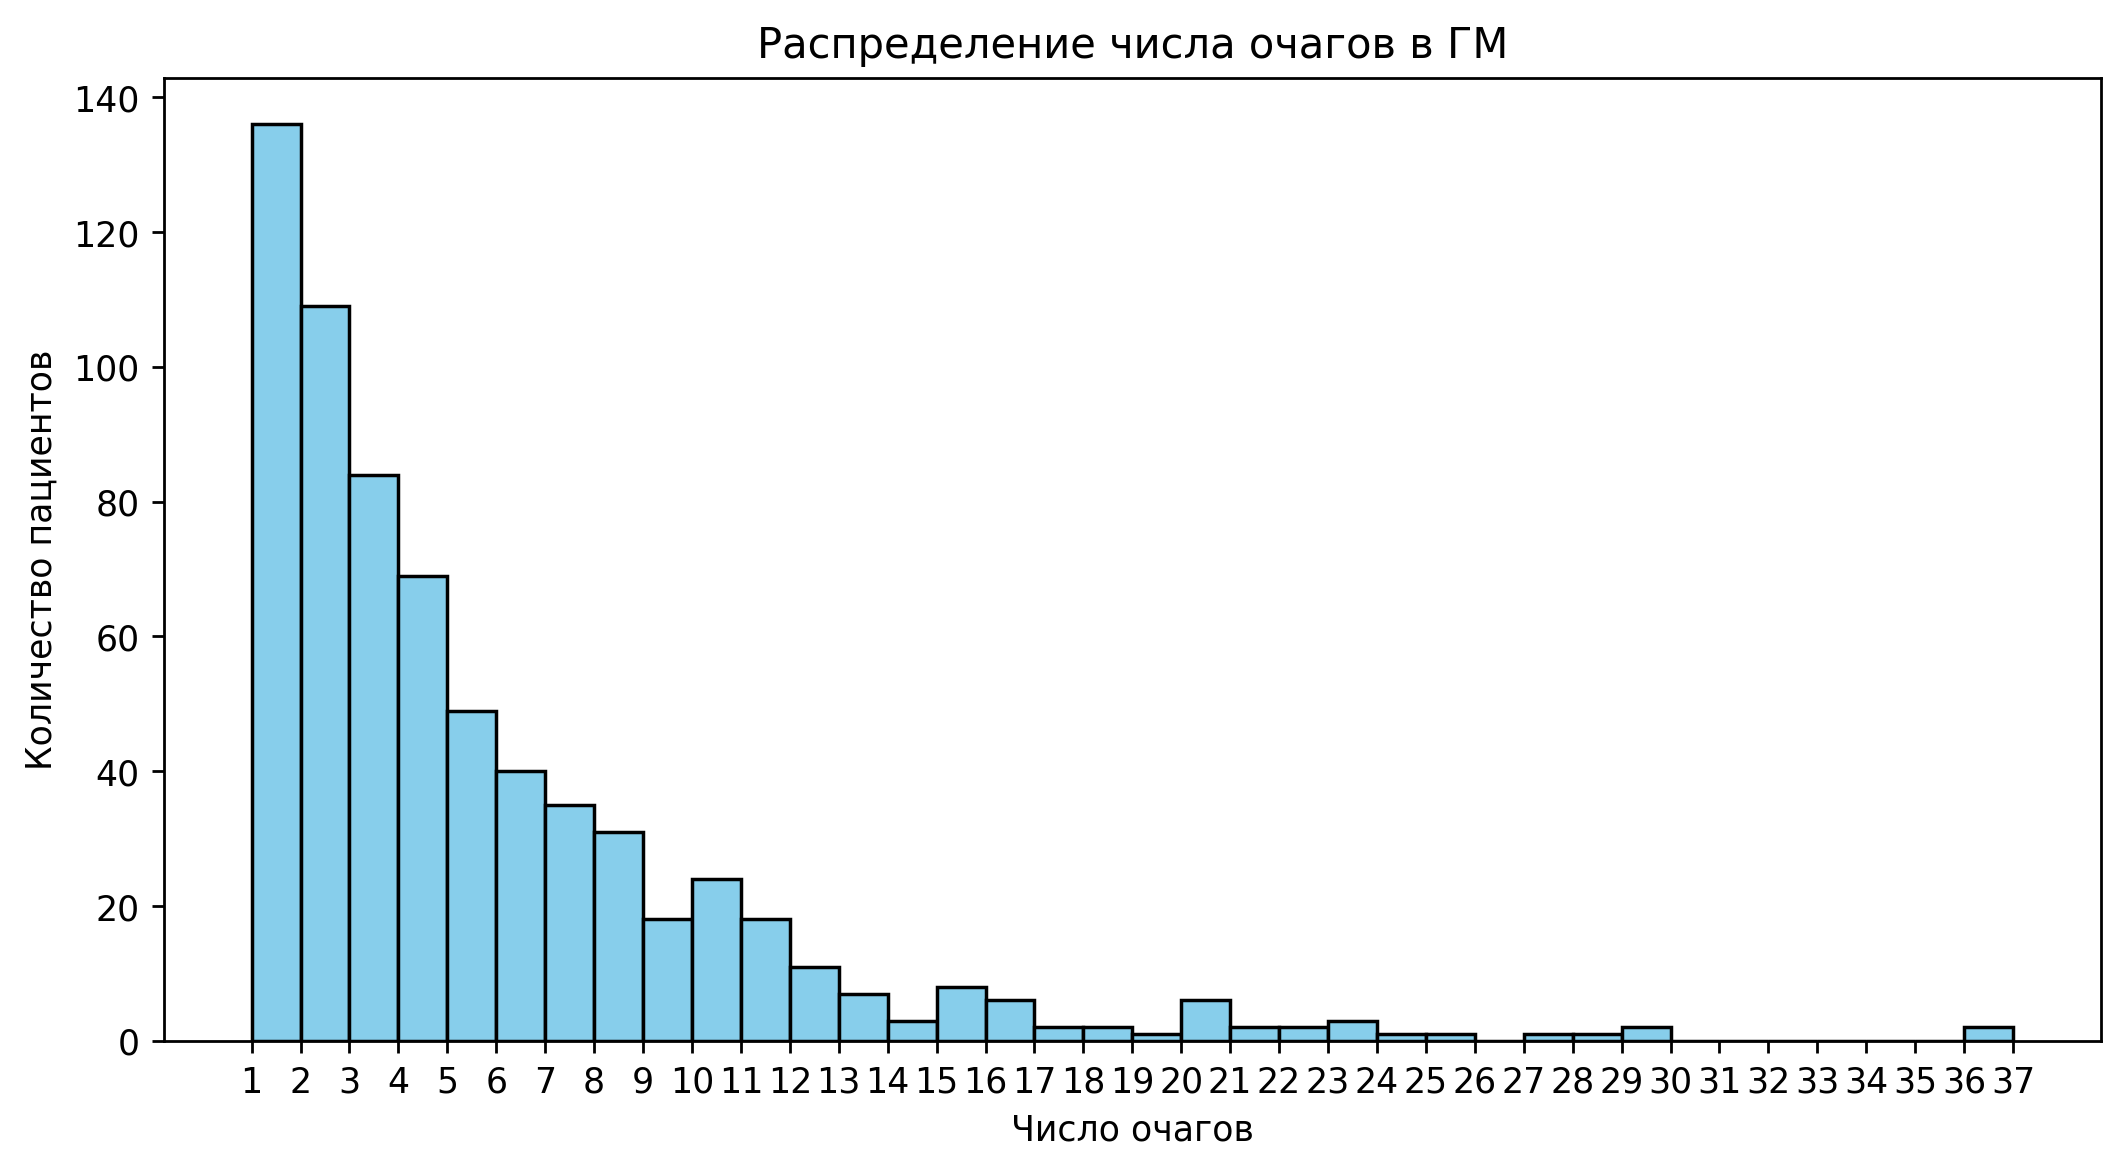

In [21]:
# Визуализация распределения 'Число очагов в ГМ'
plt.figure(figsize=(10,5), dpi=250)
plt.hist(df['Число очагов в ГМ'], bins=range(int(df['Число очагов в ГМ'].min()), int(df['Число очагов в ГМ'].max())+1), color='skyblue', edgecolor='black')
plt.title('Распределение числа очагов в ГМ')
plt.xlabel('Число очагов')
plt.ylabel('Количество пациентов')
plt.xticks(range(int(df['Число очагов в ГМ'].min()), int(df['Число очагов в ГМ'].max())+1))
plt.grid(False)
plt.show()

Количество пропущенных значений в 'Суммарный объем очагов': 0


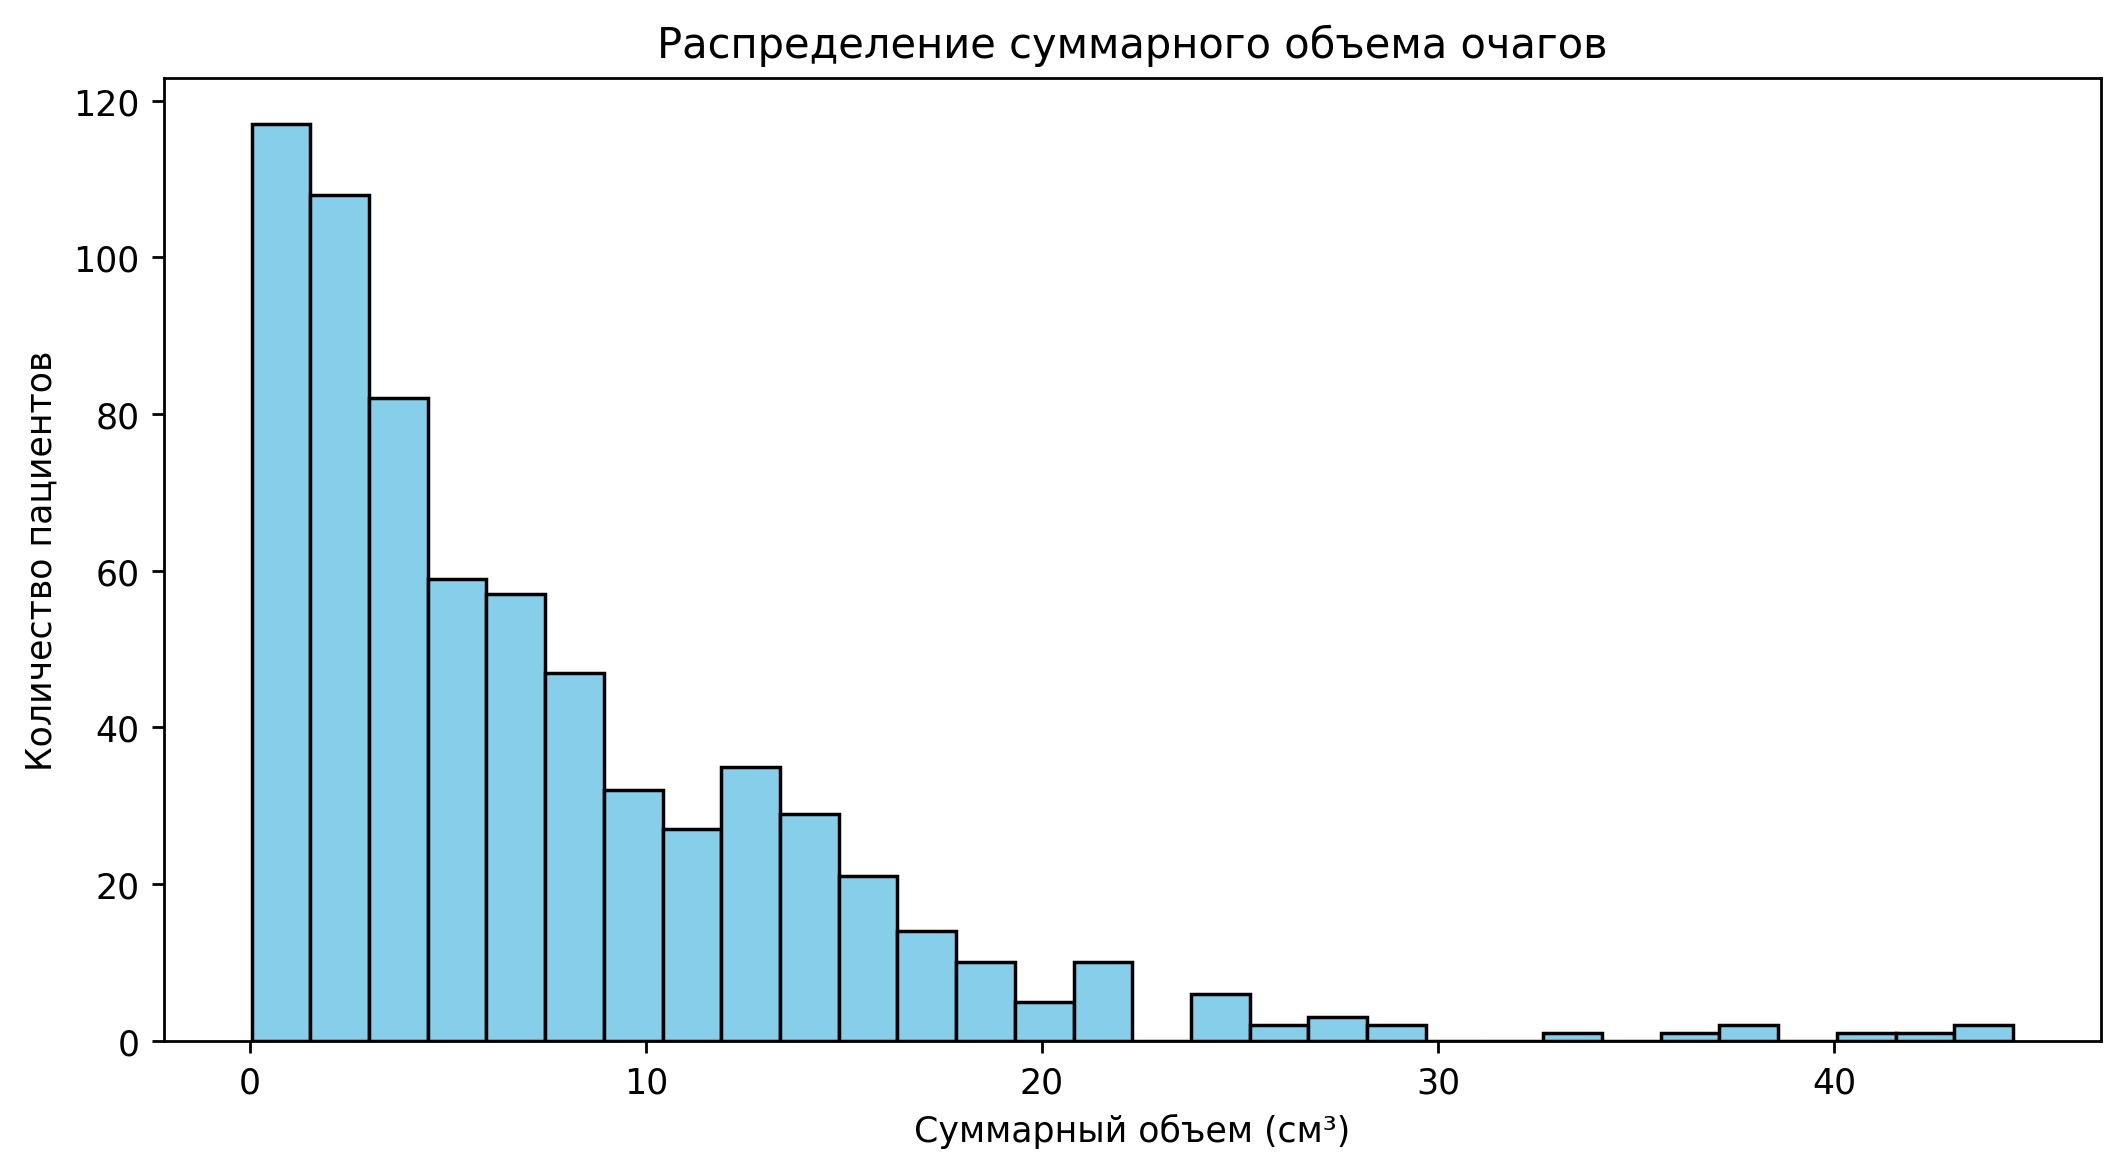

In [22]:
# Проверка наличия пропущенных значений в 'Суммарный объем очагов'
missing_total_volume = df['Суммарный объем очагов'].isna().sum()
print(f"Количество пропущенных значений в 'Суммарный объем очагов': {missing_total_volume}")

# Преобразование в числовой тип
df['Суммарный объем очагов'] = pd.to_numeric(df['Суммарный объем очагов'].str.replace(',', '.'))

# Сохранение в DataFrame признаков
df_features['Объем очагов'] = df['Суммарный объем очагов']

# Визуализация распределения 'Суммарный объем очагов'
plt.figure(figsize=(10,5), dpi=250)
plt.hist(df['Суммарный объем очагов'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение суммарного объема очагов')
plt.xlabel('Суммарный объем (см³)')
plt.ylabel('Количество пациентов')
plt.grid(False)
plt.show()

Количество пропущенных значений в 'Объем максимального очага': 0


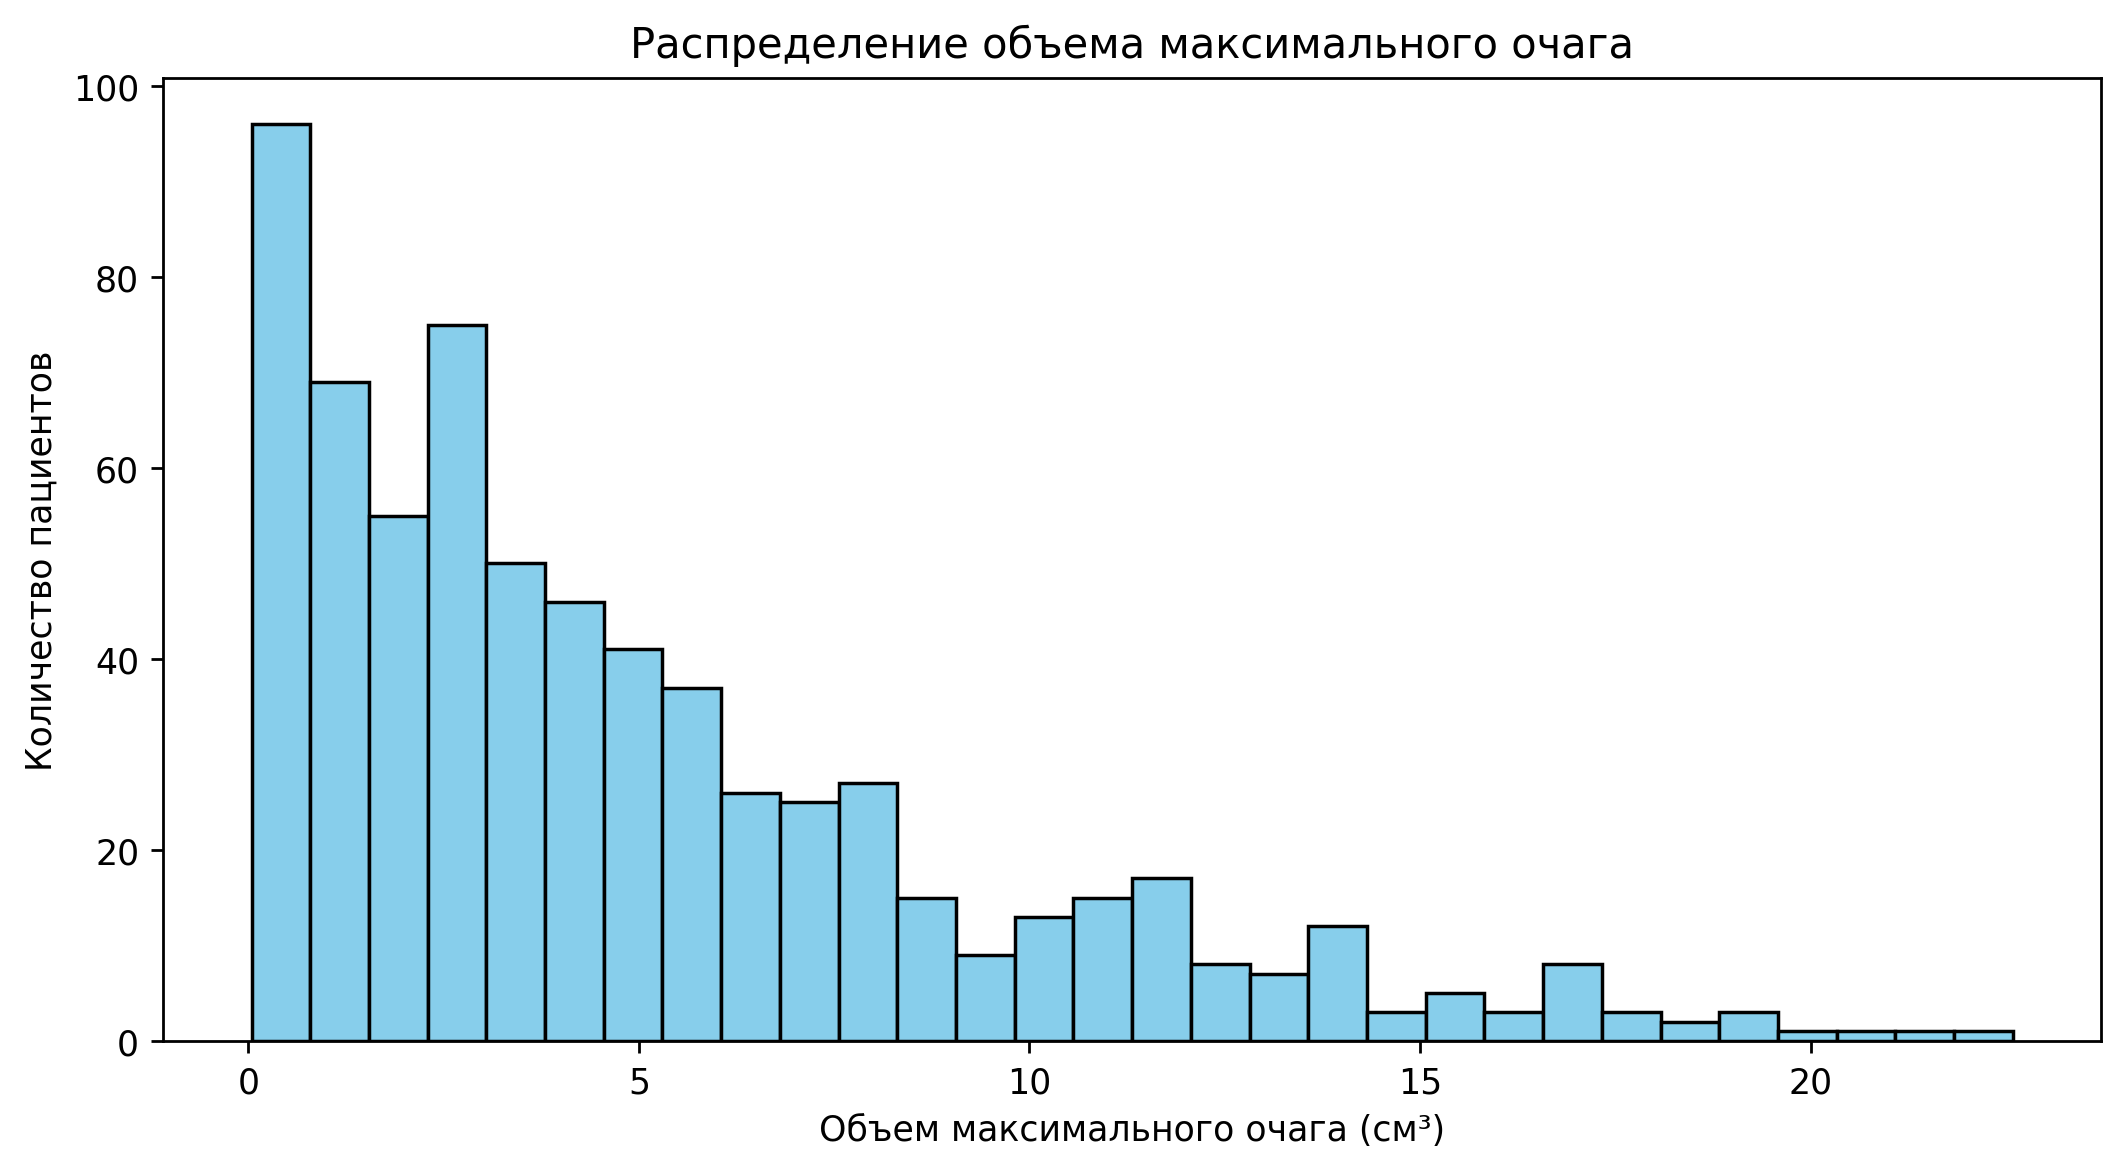

In [23]:
# Проверка наличия пропущенных значений в 'Объем максимального очага'
missing_max_volume = df['Объем максимального очага'].isna().sum()
print(f"Количество пропущенных значений в 'Объем максимального очага': {missing_max_volume}")

# Преобразование в числовой тип
df['Объем максимального очага'] = pd.to_numeric(df['Объем максимального очага'].str.replace(',', '.'))

# Сохранение в DataFrame признаков
df_features['Макс. объем очага'] = df['Объем максимального очага']

# Визуализация распределения 'Объем максимального очага'
plt.figure(figsize=(10,5), dpi=250)
plt.hist(df['Объем максимального очага'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение объема максимального очага')
plt.xlabel('Объем максимального очага (см³)')
plt.ylabel('Количество пациентов')
plt.grid(False)
plt.show()

Количество пропущенных значений в 'Число фракций СРТ': 0


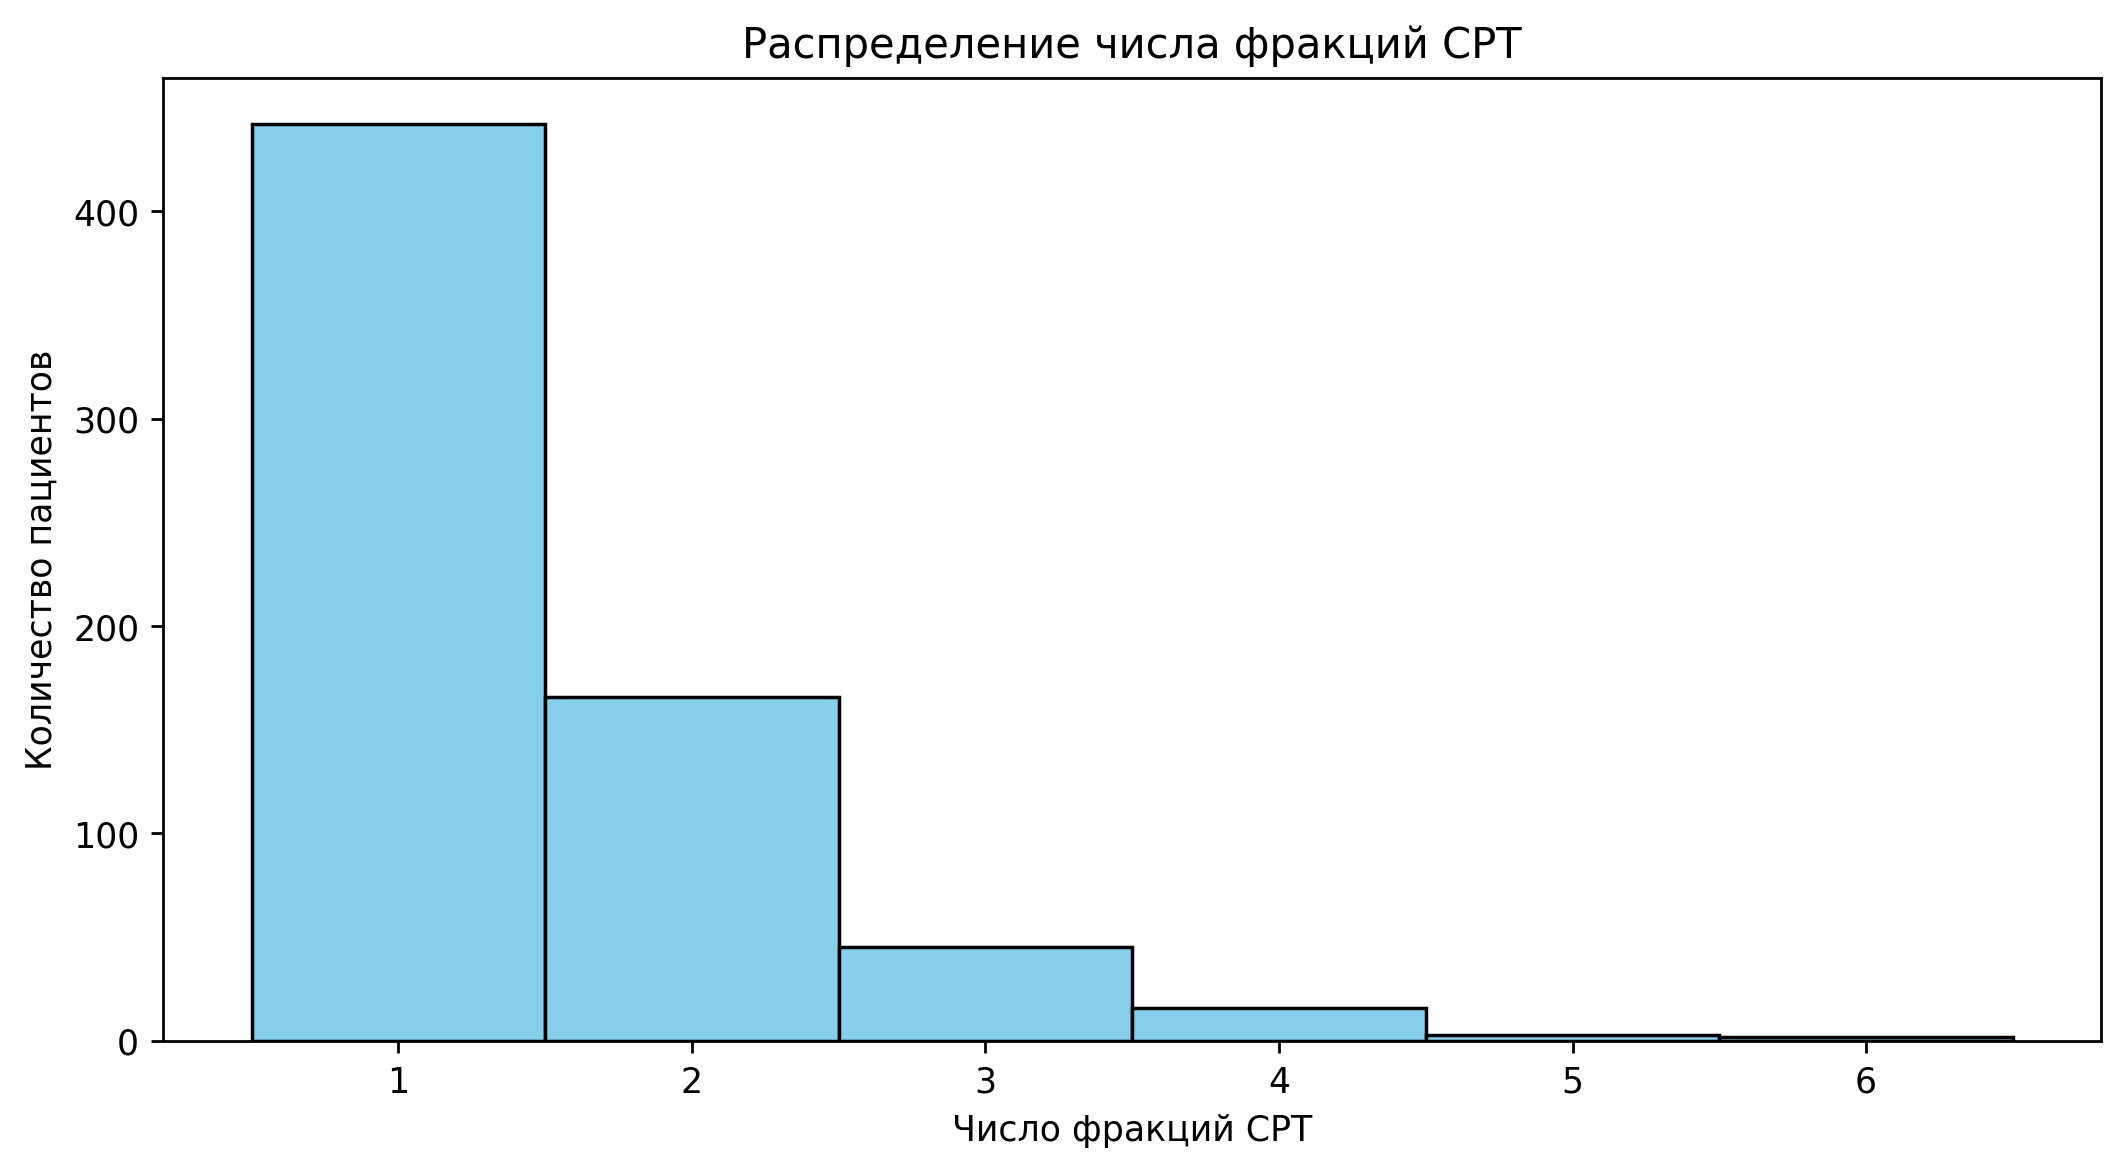

In [24]:
# Проверка наличия пропущенных значений в 'Число фракций СРТ'
missing_fractions = df['Число фракций СРТ'].isna().sum()
print(f"Количество пропущенных значений в 'Число фракций СРТ': {missing_fractions}")

# Преобразование в числовой тип
df['Число фракций СРТ'] = pd.to_numeric(df['Число фракций СРТ'])

# Сохранение в DataFrame признаков
df_features['Число фракций'] = df['Число фракций СРТ']

# Визуализация распределения 'Число фракций СРТ'
plt.figure(figsize=(10,5), dpi=250)
plt.hist(df['Число фракций СРТ'], bins=range(int(df['Число фракций СРТ'].min()), int(df['Число фракций СРТ'].max())+2), color='skyblue', edgecolor='black', align='left')
plt.title('Распределение числа фракций СРТ')
plt.xlabel('Число фракций СРТ')
plt.ylabel('Количество пациентов')
plt.xticks(range(int(df['Число фракций СРТ'].min()), int(df['Число фракций СРТ'].max())+1))
plt.show()

In [ ]:
df_features

<class 'pandas.core.frame.DataFrame'>
Index: 674 entries, 0 to 851
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Прогрессия         674 non-null    int32  
 1   Пол                674 non-null    Int8   
 2   Диагноз            674 non-null    int8   
 3   Число очагов       674 non-null    int64  
 4   Объем очагов       674 non-null    float64
 5   Макс. объем очага  674 non-null    float64
 6   Число фракций      674 non-null    int64  
dtypes: Int8(1), float64(2), int32(1), int64(2), int8(1)
memory usage: 30.9 KB


Количество пропущенных значений в 'Индекс Карновского': 0


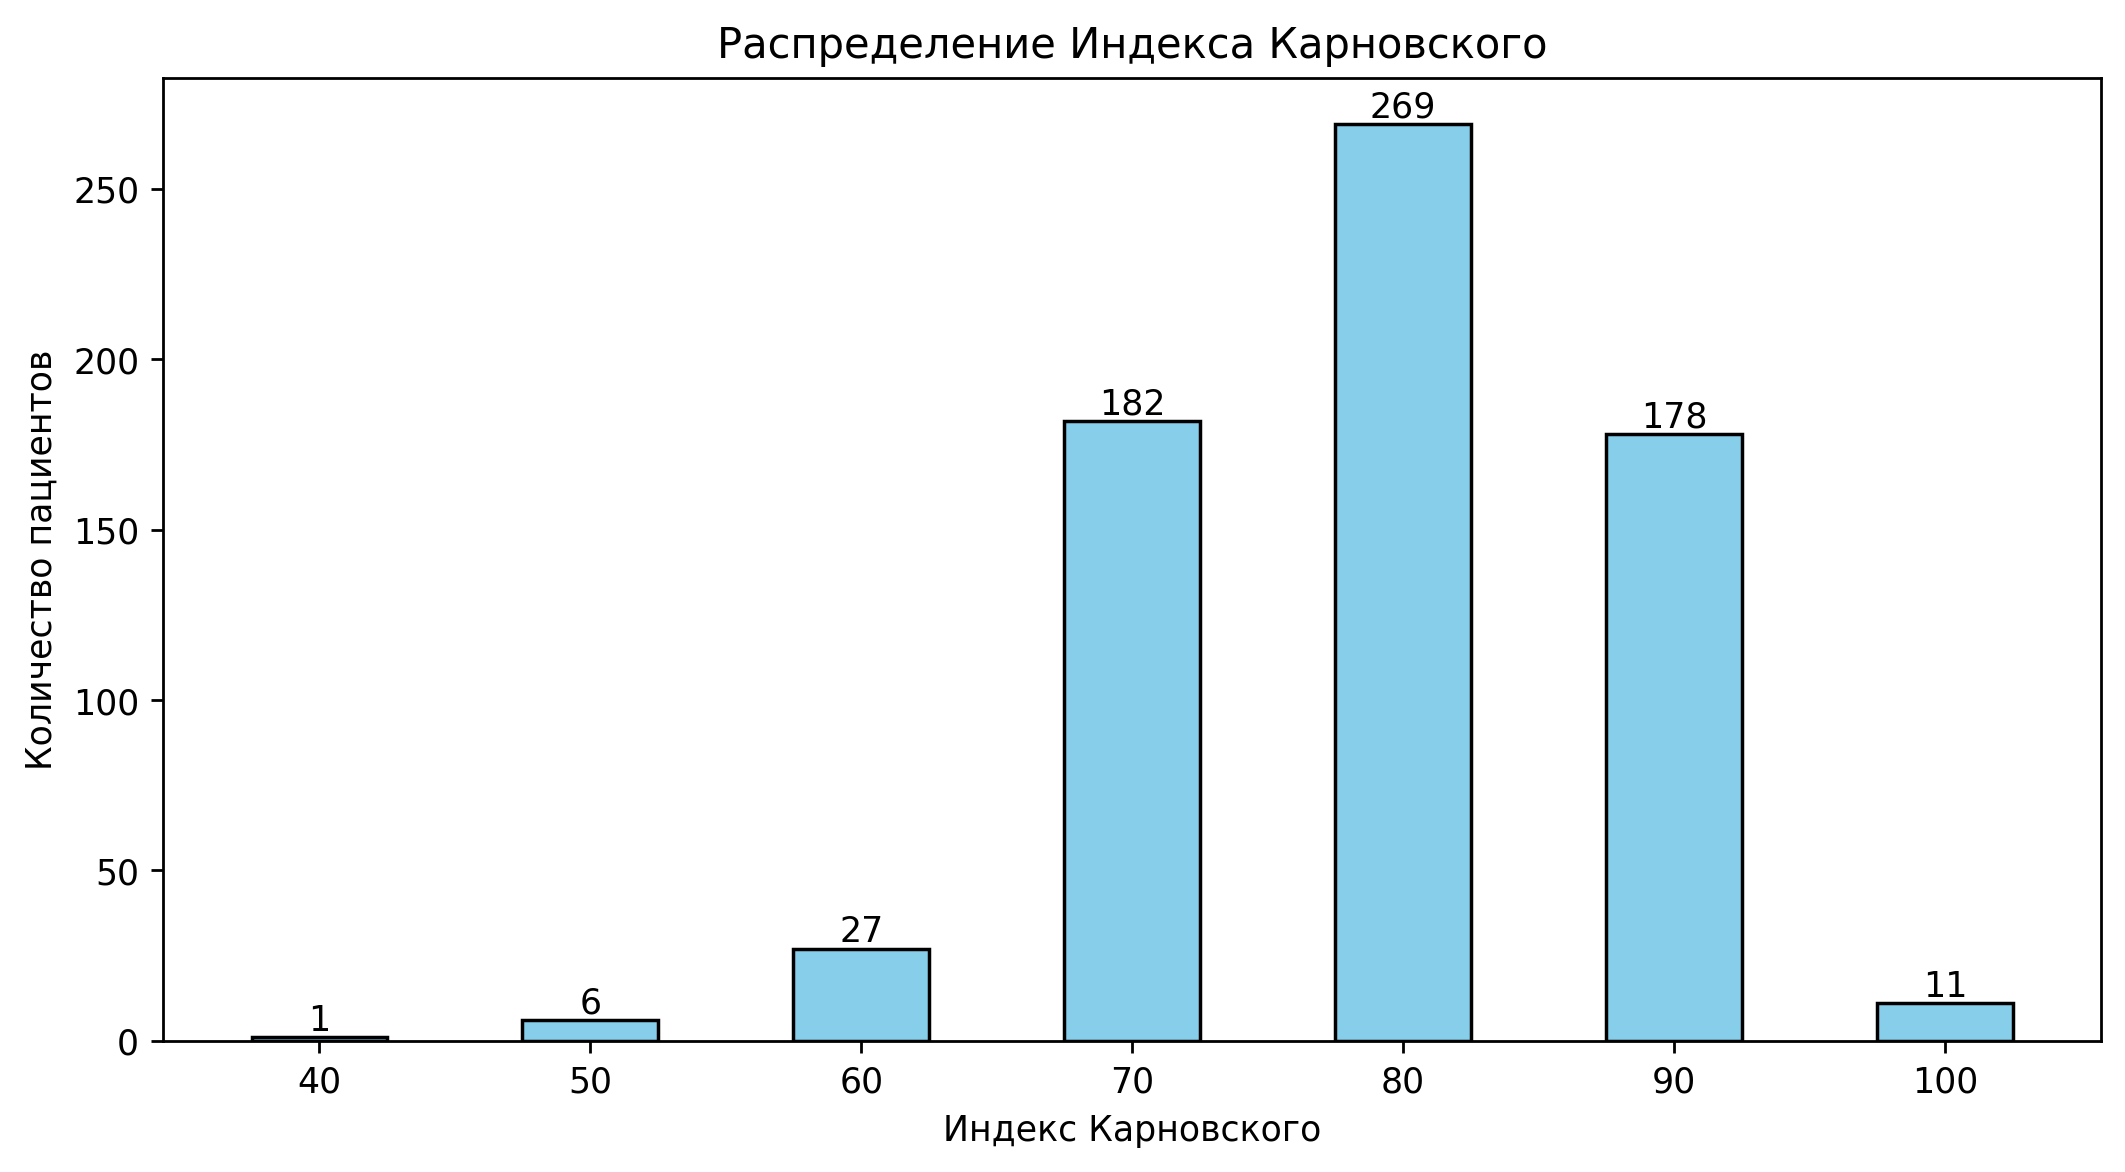

In [26]:
# Проверка наличия пропущенных значений в 'Индекс Карновского'
missing_karnofsky = df['Индекс Карновского'].isna().sum()
print(f"Количество пропущенных значений в 'Индекс Карновского': {missing_karnofsky}")

# Преобразование в числовой тип
df['Индекс Карновского'] = pd.to_numeric(df['Индекс Карновского'])

# Сохранение в DataFrame признаков
df_features['Индекс Карновского'] = df['Индекс Карновского']

# Визуализация распределения 'Индекс Карновского'
plt.figure(figsize=(10,5), dpi=250)
counts = df['Индекс Карновского'].value_counts().sort_index()
bars = plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black', width = 5)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )
plt.title('Распределение Индекса Карновского')
plt.xlabel('Индекс Карновского')
plt.ylabel('Количество пациентов')
plt.xticks(counts.index)
plt.grid(False)
plt.show()

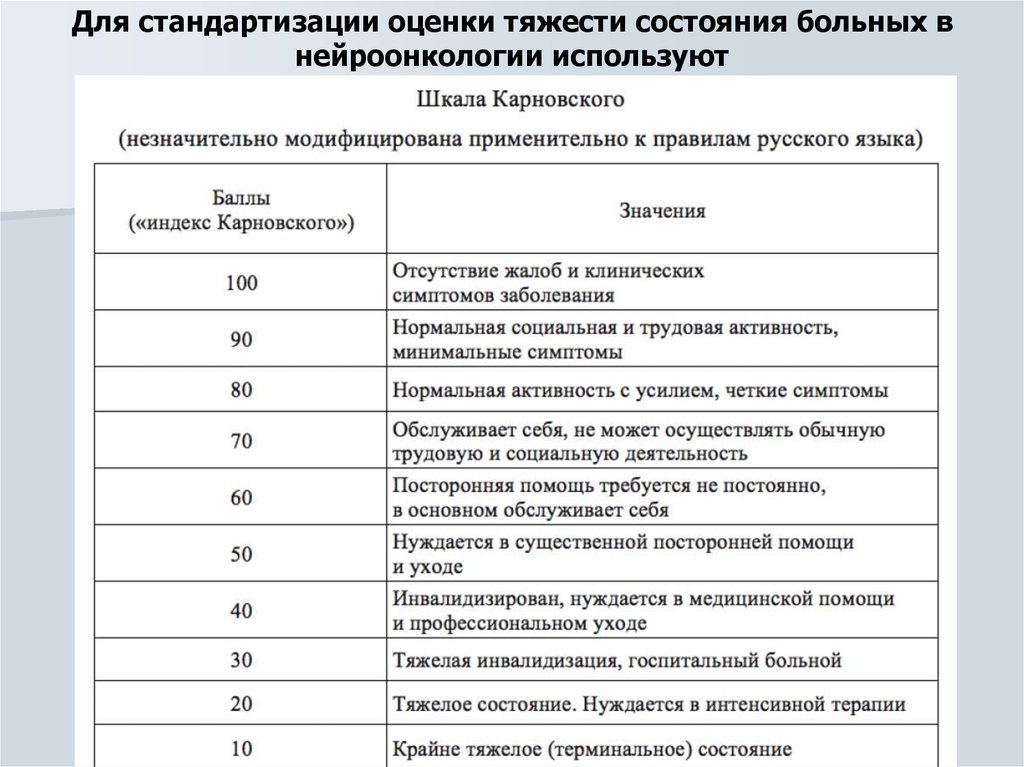

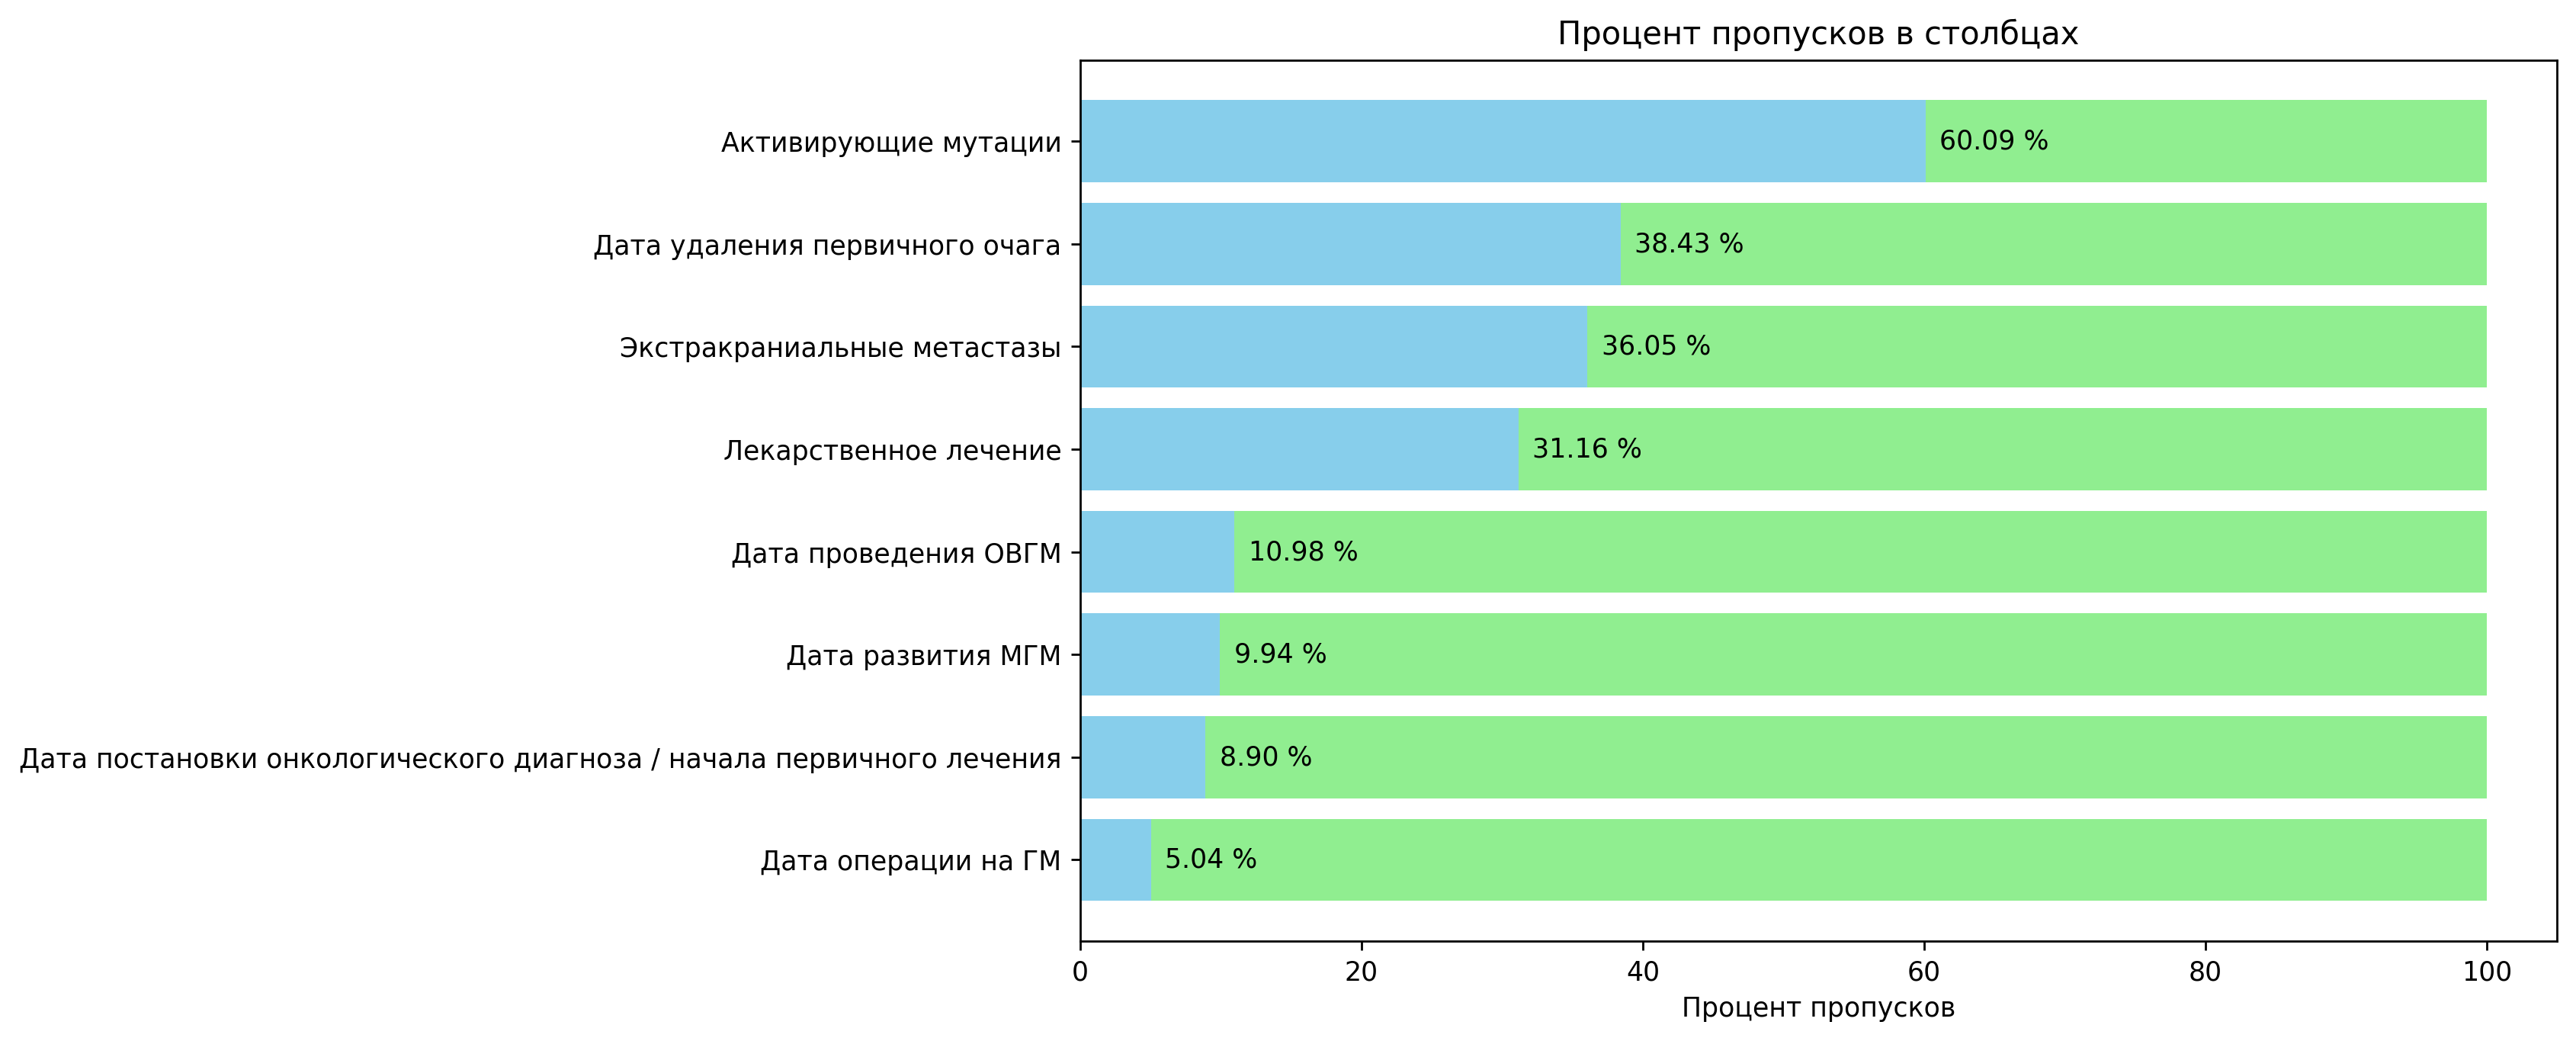

In [27]:
# Список интересующих столбцов
columns_to_analyze = [
    'Дата постановки онкологического диагноза / начала первичного лечения',
    'Дата удаления первичного очага',
    'Дата развития МГМ',
    'Активирующие мутации',
    'Дата проведения ОВГМ',
    'Дата операции на ГМ',
    'Экстракраниальные метастазы',
    'Лекарственное лечение'
]

# Создание списка для сбора данных о пропусках
missing_data_list = []

total_rows = len(df)

for col in columns_to_analyze:
    missing_count = df[col].isna().sum()
    missing_percent = (missing_count / total_rows) * 100
    missing_data_list.append({
        'Столбец': col,
        'Количество пропусков': missing_count,
        'Процент пропусков': missing_percent
    })

# Создание DataFrame из списка
missing_data = pd.DataFrame(missing_data_list)

# Сортировка по проценту пропусков
missing_data = missing_data.sort_values(by='Процент пропусков', ascending=False)

# Визуализация пропусков
plt.figure(figsize=(10,6), dpi=250)

bars = plt.barh(missing_data['Столбец'], missing_data['Процент пропусков'], color='skyblue')
plt.barh(missing_data['Столбец'], 100 - missing_data['Процент пропусков'], color='lightgreen', left=missing_data['Процент пропусков'])
for bar in bars:
    width = bar.get_width()
    plt.text(
        width+1,
        bar.get_y() + bar.get_height() / 2,
        f'{width:.2f} %',
        ha='left',
        va='center'
    )
plt.xlabel('Процент пропусков')
plt.title('Процент пропусков в столбцах')
plt.gca().invert_yaxis()  # Инвертировать ось Y для лучшего отображения
plt.grid(False)
# plt.savefig('percentage_of_omission.png', bbox_inches='tight', dpi=300)
plt.show()

In [28]:
# Выбор двух признаков
feature_x = 'Активирующие мутации'
feature_y = 'Лекарственное лечение'
data = df[[feature_x, feature_y]]

data = data.dropna()

data['Активирующие мутации'] = data['Активирующие мутации'].astype('category').cat.codes
data['Лекарственное лечение'] = data['Лекарственное лечение'].astype('category').cat.codes

# Шаг 5: Вычисление коэффициентов корреляции
pearson_corr = data[feature_x].corr(data[feature_y])
print(f"\nКоэффициент корреляции между {feature_x} и {feature_y}: {pearson_corr:.2f}")


Коэффициент корреляции между Активирующие мутации и Лекарственное лечение: 0.95


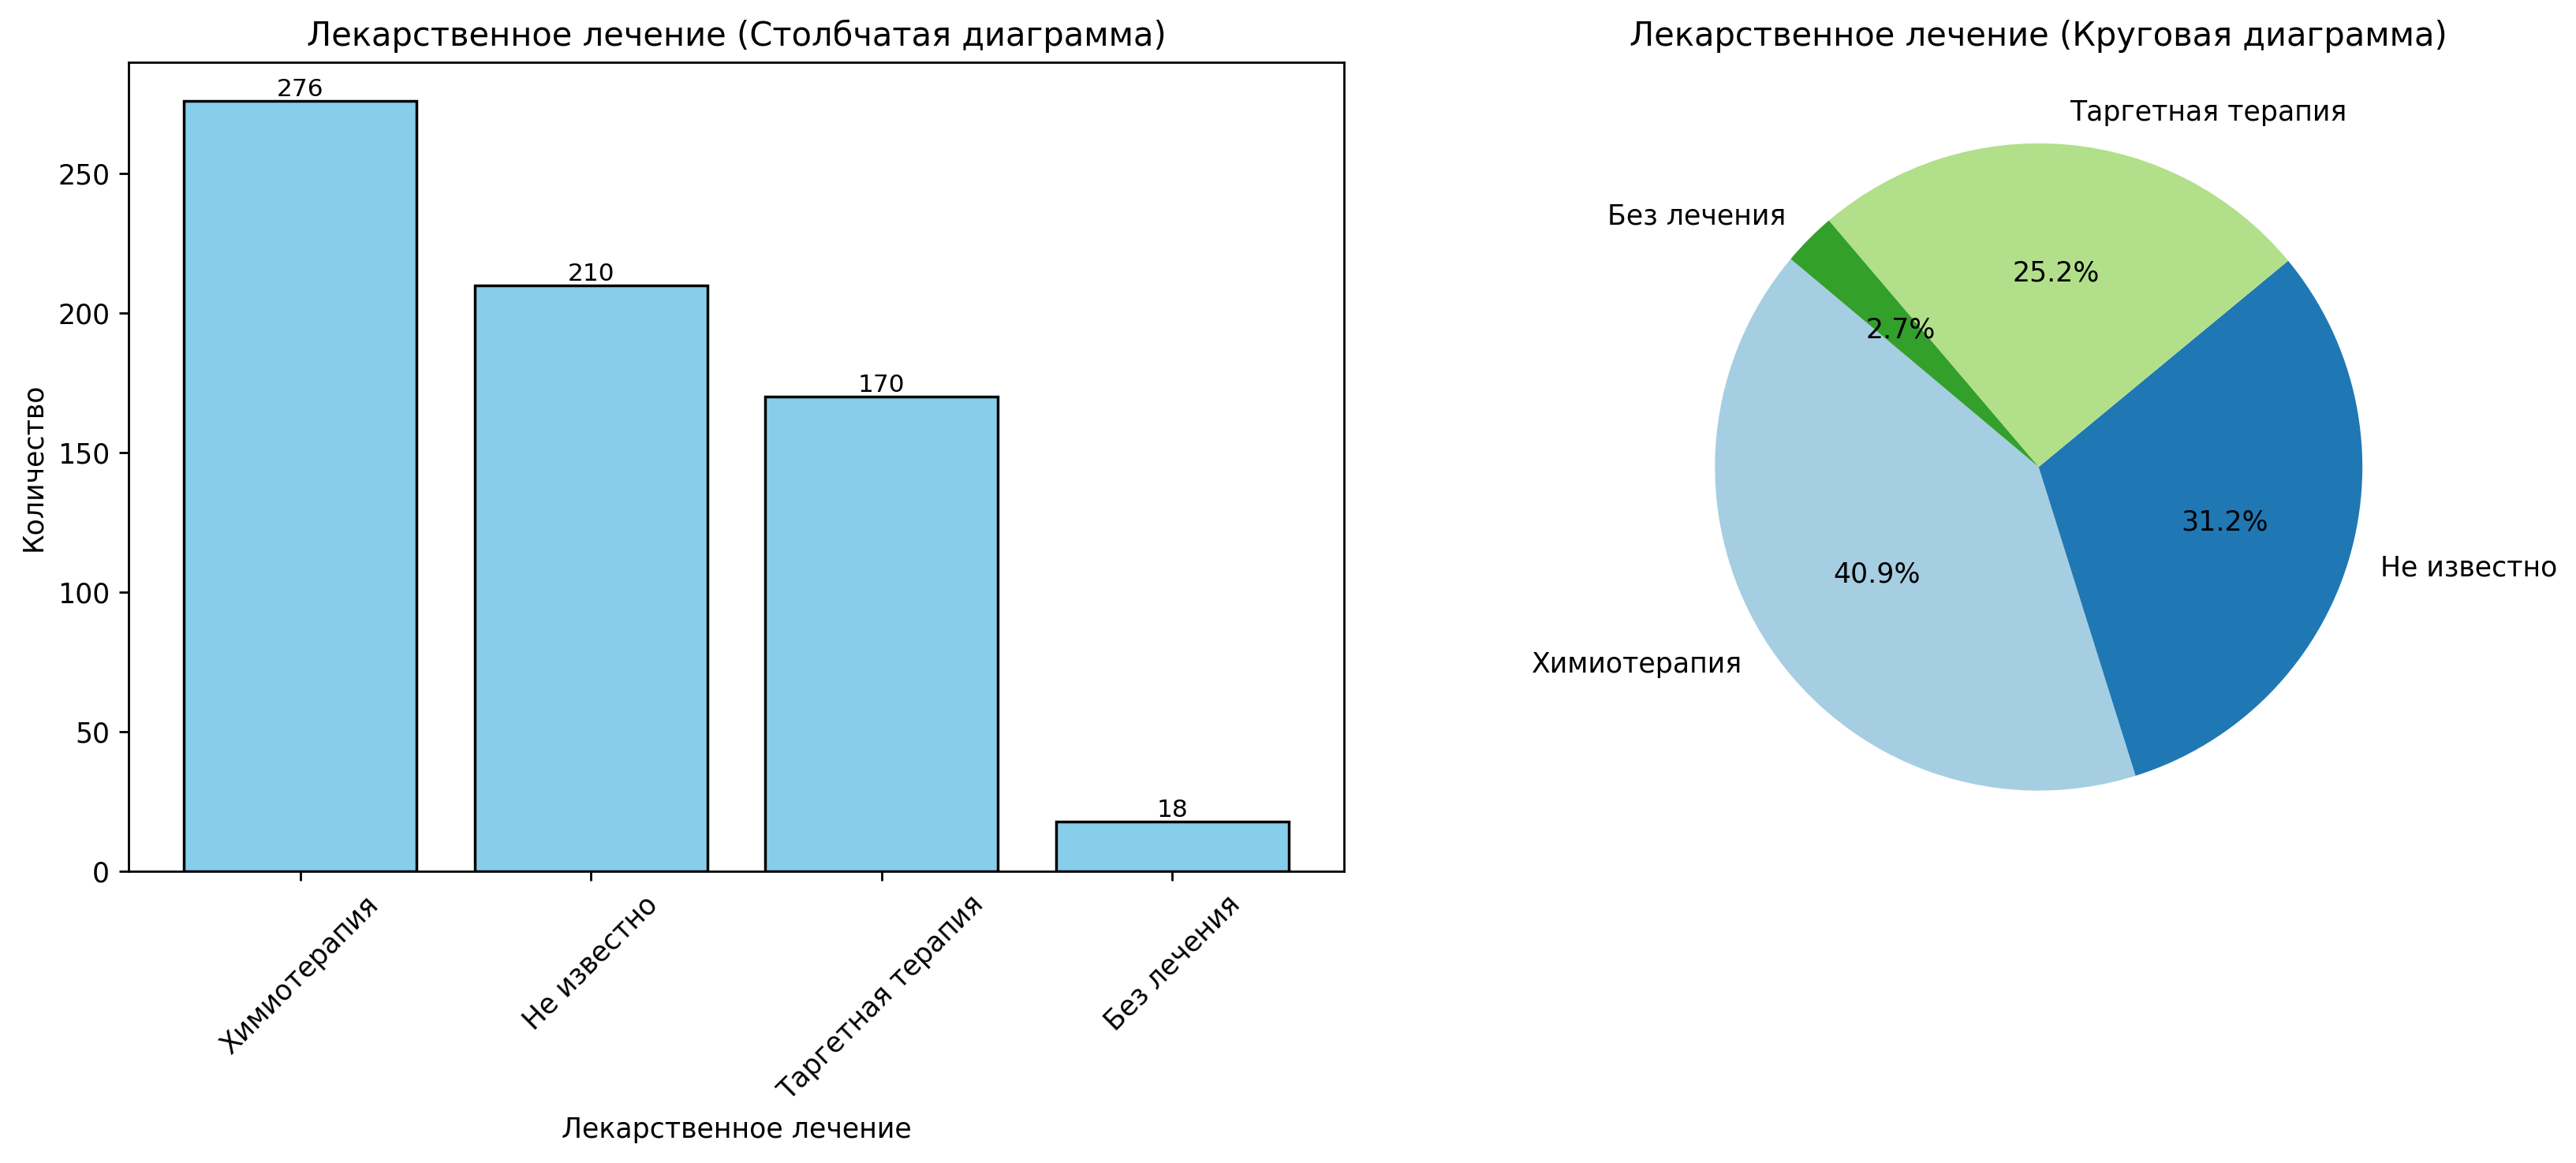

In [29]:
# Замена пропусков на 'не известно'
df['Лекарственное лечение'] = df['Лекарственное лечение'].fillna('Не известно')

# Кодирование категориальных признаков и сохранение в `df_features`
df_features['Лекарственное лечение'] = df['Лекарственное лечение'].astype('category').cat.codes

# Подсчет количества каждого значения в столбце
counts = df['Лекарственное лечение'].value_counts()

# Создание фигуры с двумя подграфиками: столбчатая и круговая диаграммы
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=250)

# Столбчатая диаграмма
bars = axes[0].bar(
    counts.index,
    counts.values,
    color='skyblue',
    edgecolor='black'
)
# Добавление числовых значений на столбцы
for bar in bars:
    height = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height}',
        ha='center',
        va='bottom',
        fontsize=9
    )
axes[0].set_title(f'Лекарственное лечение (Столбчатая диаграмма)', fontsize=12)
axes[0].set_xlabel('Лекарственное лечение', fontsize=10)
axes[0].set_ylabel('Количество', fontsize=10)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(False)

# Круговая диаграмма
axes[1].pie(
    counts,
    labels=counts.index,
    autopct='%.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
axes[1].set_title(f'Лекарственное лечение (Круговая диаграмма)', fontsize=12)

# Обеспечение автоматической подгонки подграфиков
plt.tight_layout()

# Отображение диаграмм
plt.show()

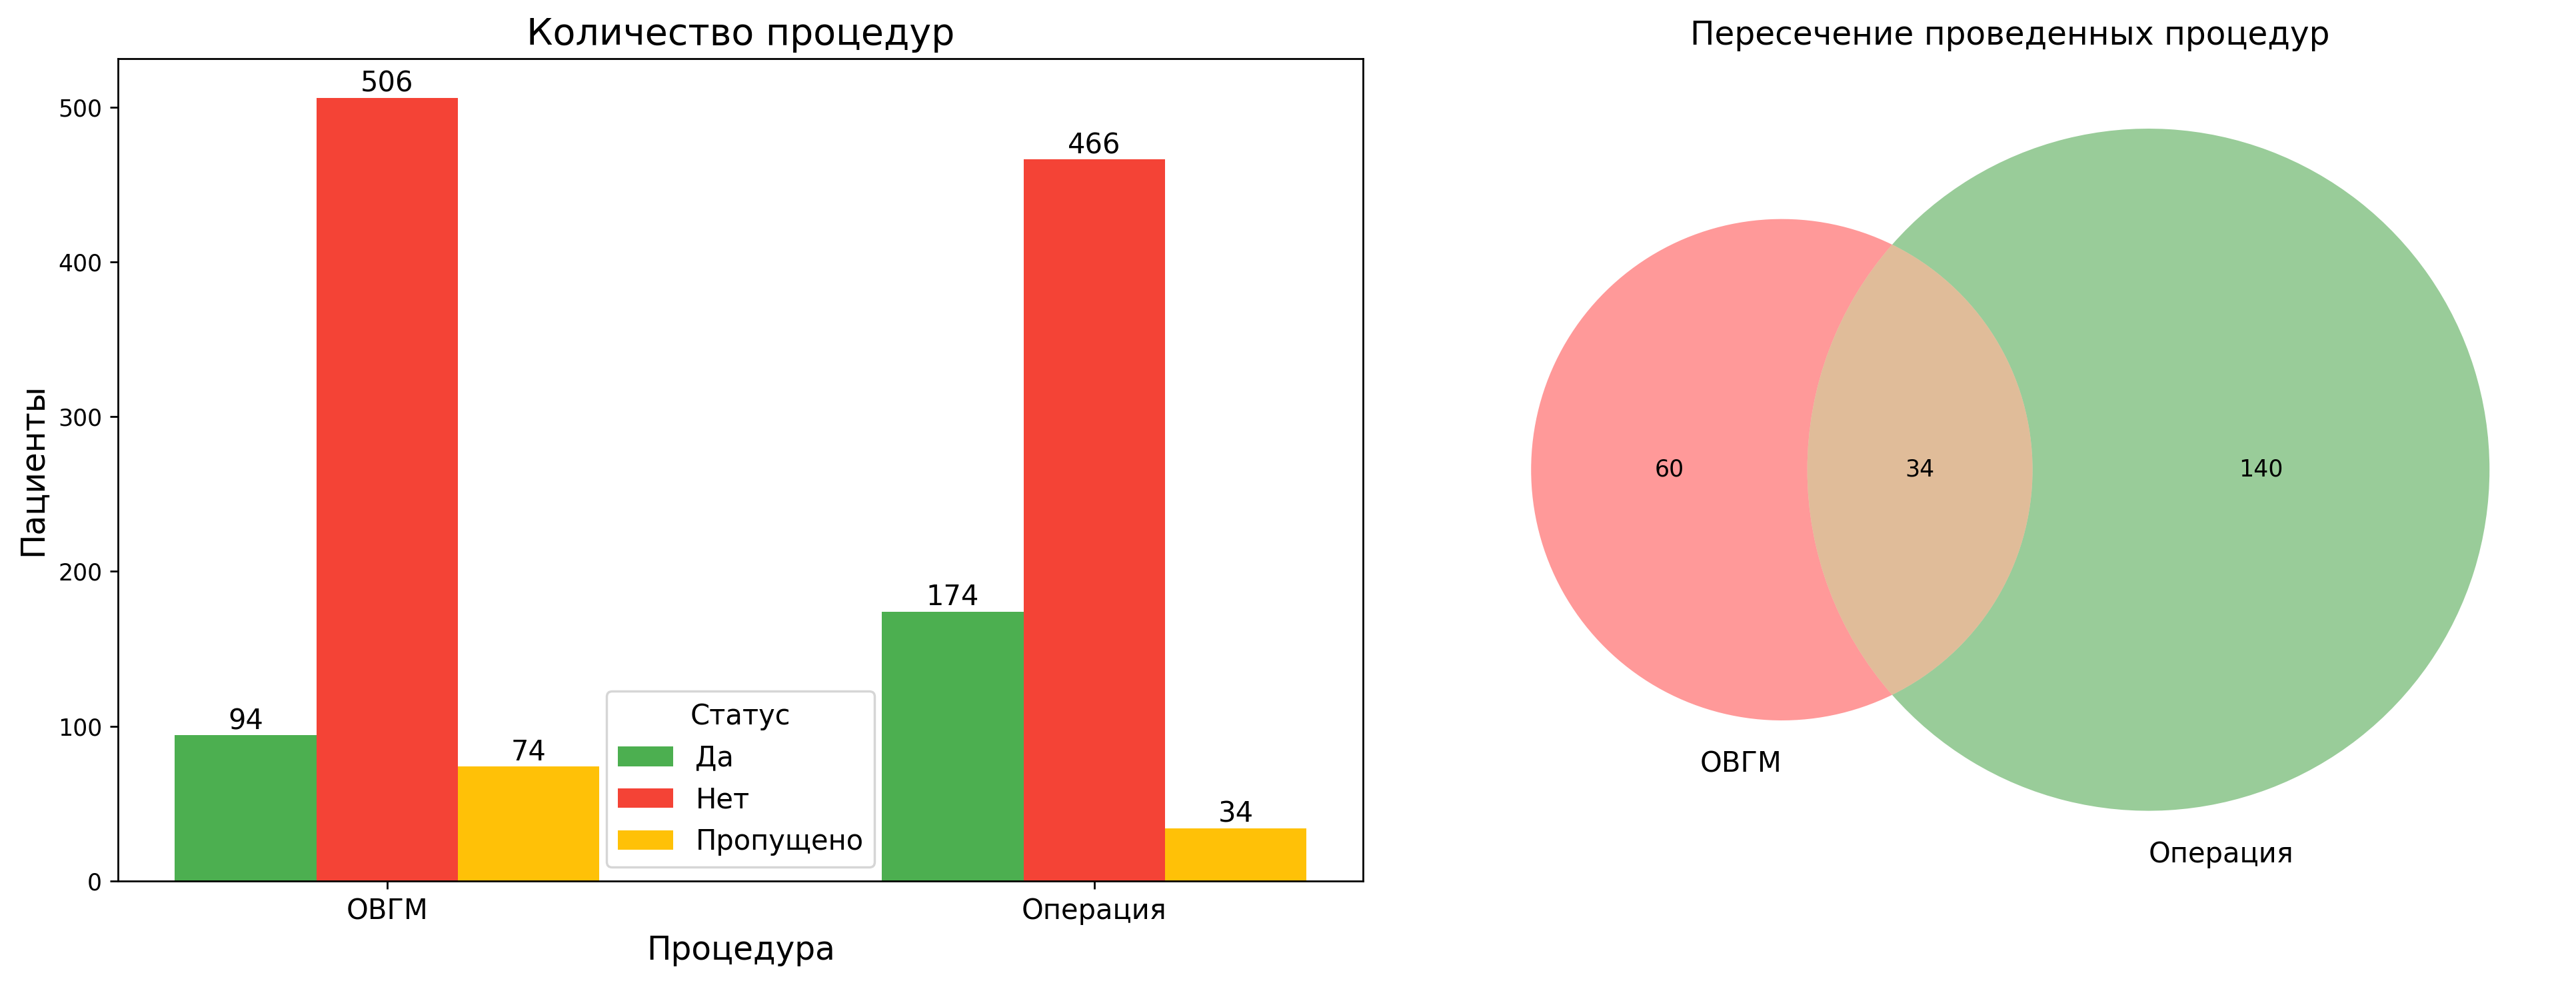

In [30]:
# Функция для преобразования значений
def map_binary(x):
    if pd.isna(x):
        return np.nan
    elif str(x).strip().lower() == 'нет':
        return 0
    else:
        return 1

# Применение функции к столбцам
df['ОВГМ'] = df['Дата проведения ОВГМ'].apply(map_binary)
df['Операция'] = df['Дата операции на ГМ'].apply(map_binary)

# Сохранение в DataFrame признаков
df_features['ОВГМ'] = df['ОВГМ'].astype('Int8')
df_features['Операция'] = df['Операция'].astype('Int8')

# Подготовка данных для гистограммы
melted_df = df.melt(
    value_vars=['ОВГМ', 'Операция'],
    var_name='Процедура',
    value_name='Проводили'
)

# Переименование значений для удобства
melted_df['Проводили'] = melted_df['Проводили'].map({0: 'Нет', 1: 'Да'})
melted_df['Проводили'] = melted_df['Проводили'].fillna('Пропущено')

# Подсчет количества для гистограммы
count_data = melted_df.groupby(['Процедура', 'Проводили']).size().unstack(fill_value=0)

# Создание фигуры с двумя подграфиками рядом
fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=250)

# Определение категорий и цветов
categories = ['Да', 'Нет', 'Пропущено']
colors = ['#4CAF50', '#F44336', '#FFC107']  # Зеленый, Красный, Желтый

# Параметры графика
procedures = count_data.index.tolist()
num_procedures = len(procedures)
num_categories = len(categories)
bar_width = 0.2
index = np.arange(num_procedures)

# Построение столбцов для каждой категории
for i, category in enumerate(categories):
    counts = count_data[category].values
    axes[0].bar(index + i * bar_width, counts, bar_width, label=category, color=colors[i])

# Добавление подписей и заголовка
axes[0].set_xlabel('Процедура', fontsize=14)
axes[0].set_ylabel('Пациенты', fontsize=14)
axes[0].set_title('Количество процедур', fontsize=16)
axes[0].set_xticks(index + bar_width, procedures, fontsize=12)
axes[0].legend(title='Статус', fontsize=12, title_fontsize=12)
axes[0].grid(False)

# Добавление подписей над столбцами
for i, category in enumerate(categories):
    counts = count_data[category].values
    for j in range(num_procedures):
        if counts[j] > 0:
            axes[0].text(index[j] + i * bar_width, counts[j] + 0.1, str(counts[j]), ha='center', va='bottom', fontsize=12)


# 2. Диаграмма Венна (Эйлера)
# Подготовка данных для диаграммы Венна
# Определяем множества
set_ovgm = set(df.index[df['ОВГМ'] == 1])
set_gm = set(df.index[df['Операция'] == 1])

# Подсчет пересечений
only_ovgm = len(set_ovgm - set_gm)
only_gm = len(set_gm - set_ovgm)
both = len(set_ovgm & set_gm)

# Создание диаграммы Венна
venn = venn2(subsets=(only_ovgm, only_gm, both), set_labels=('ОВГМ', 'Операция'), ax=axes[1])

# Настройка заголовка
axes[1].set_title('Пересечение проведенных процедур', fontsize=14)

# Отображение диаграмм
plt.tight_layout()
plt.show()

In [31]:
df_features = df_features.dropna()
df_features = df_features.reset_index(drop=True)
display(df_features)

,Прогрессия,Пол,Диагноз,Число очагов,Объем очагов,Макс. объем очага,Число фракций,Индекс Карновского,Лекарственное лечение,ОВГМ,Операция
0,1,1,3,2,7.92,7.90,1,90,1,1,0
1,1,1,3,9,0.52,0.14,1,90,3,0,0
2,1,0,4,3,5.04,3.30,1,90,2,0,0
3,1,1,4,2,2.25,2.25,4,90,1,0,1
4,1,0,4,15,9.65,4.60,1,60,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
592,0,0,2,6,6.82,3.79,1,60,1,0,0
593,0,1,2,10,1.61,0.60,1,90,1,0,0
594,1,0,1,2,2.52,2.49,1,70,1,0,1
595,0,0,2,2,25.27,22.59,2,60,1,1,1


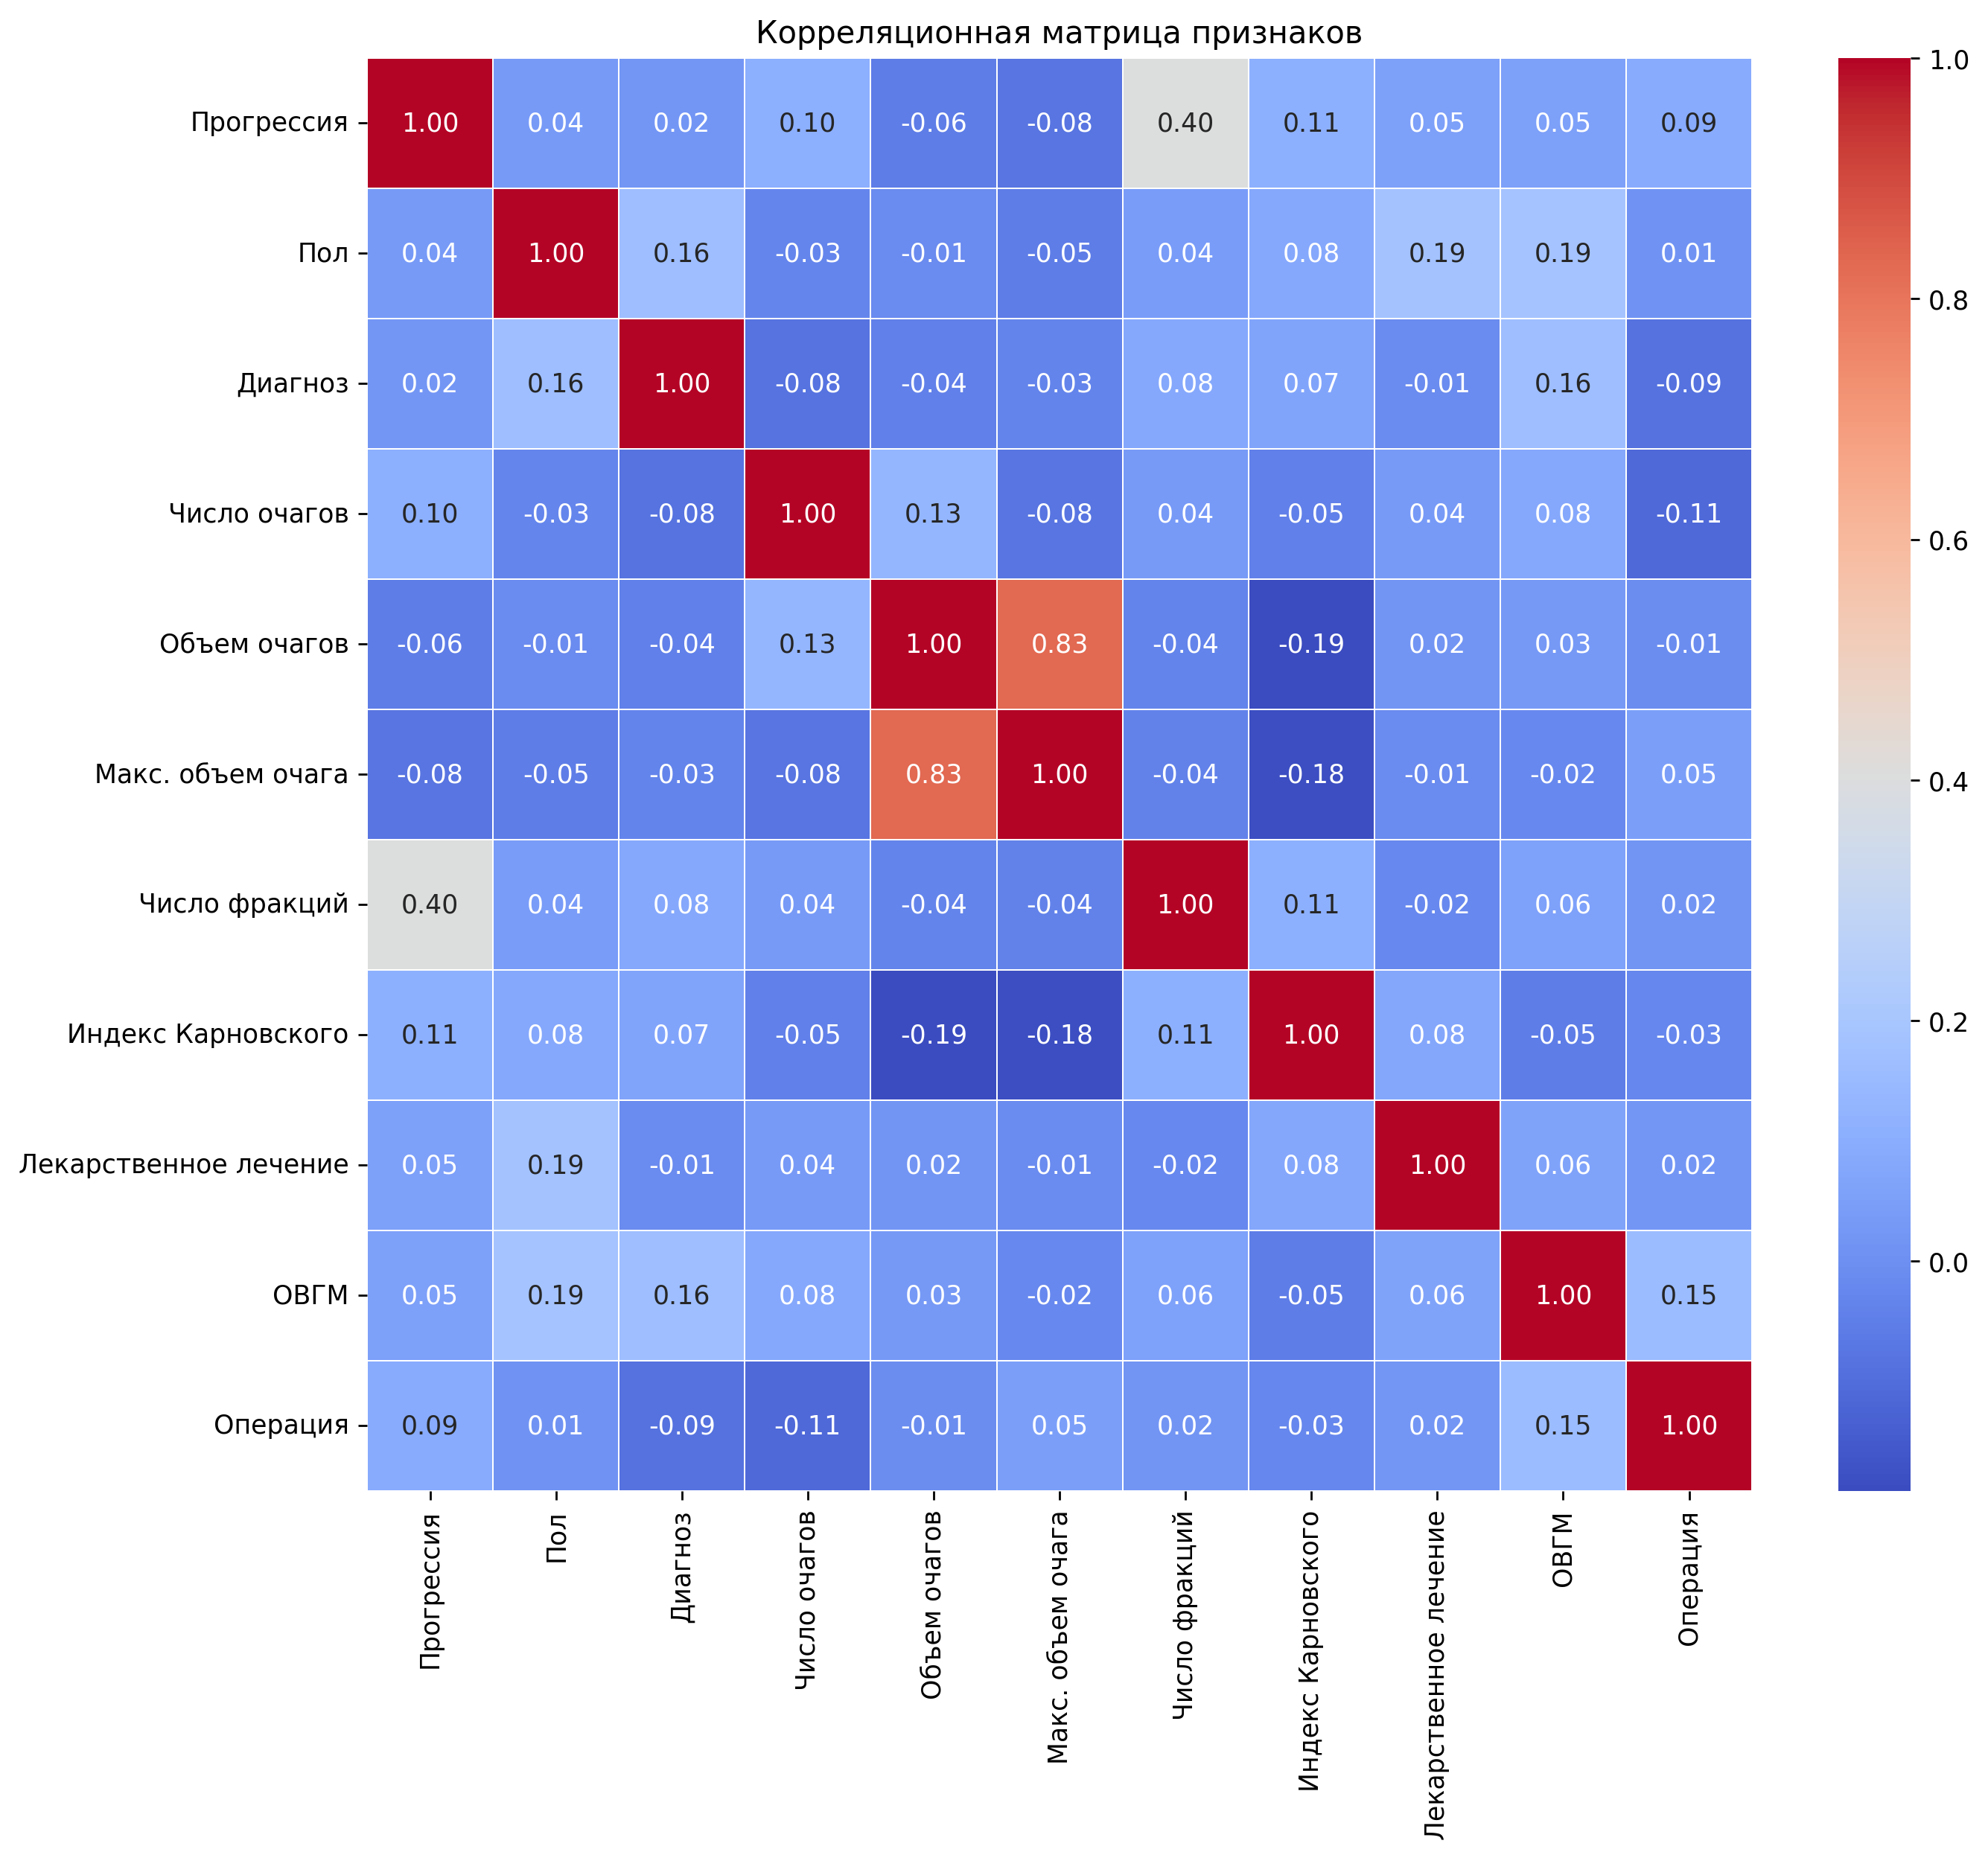

In [32]:
# Вычисление корреляционной матрицы
corr_matrix = df_features.corr()

# Настройка размера графика
plt.figure(figsize=(12, 10), dpi=250)

# Построение тепловой карты с использованием seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Добавление заголовка
plt.title('Корреляционная матрица признаков')

plt.savefig('correlation_matrix.png', bbox_inches='tight', dpi=300)
# Отображение графика
plt.show()